In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#  Understanding Power tranforms



This dataset is available on the github url:  **https://github.com/supportvectors/ml-100**. 

## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in data science notebooks upto Lesson 11.

Many of the pertinent discussions are present therein; for brevity, we will not repeat those explanations, and will omit some of the steps, so that we can focus on the main topic on this notebook.

## Lab Goals

* We will explore this data, observe its statistical characteristics, visualize it.
* Next, we will take a systematic approach to build  linear and polynomial regression models to make prediction on the data. 
* Finally, we will perform a power-transform on the data, to build a better model.

## Outcome

This lab should have introduced you to the value of power transforms.

# LGLIN

Let us load the data from the specified url, into a Pandas dataframe. Looking at the github site mentioned above, we see that the dataset is stored as a CSV file, and can be accessed at the url:
https://raw.githubusercontent.com/supportvectors/ml-100/master/lglin.csv

Let us, therefore, load it, and perform some basic explorations.

In [2]:
source = 'https://raw.githubusercontent.com/supportvectors/ml-100/master/lglin.csv'
data = pd.read_csv(source)


## Descriptive statistics
Let us quickly observe the key descriptive statistics.

In [3]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x,2000.0,0.500000,0.288892,0.000000,0.250000,0.500000,0.750000,1.000000
y,2000.0,0.000639,0.000721,0.000025,0.000121,0.000339,0.000906,0.004706


## Missing Values Analysis


In [4]:
data.isnull().sum()

x    0
y    0
dtype: int64

## Data Visualization

Observe that the data distinctly exhibits nonlinearity of relationship between $x$ and $y$.

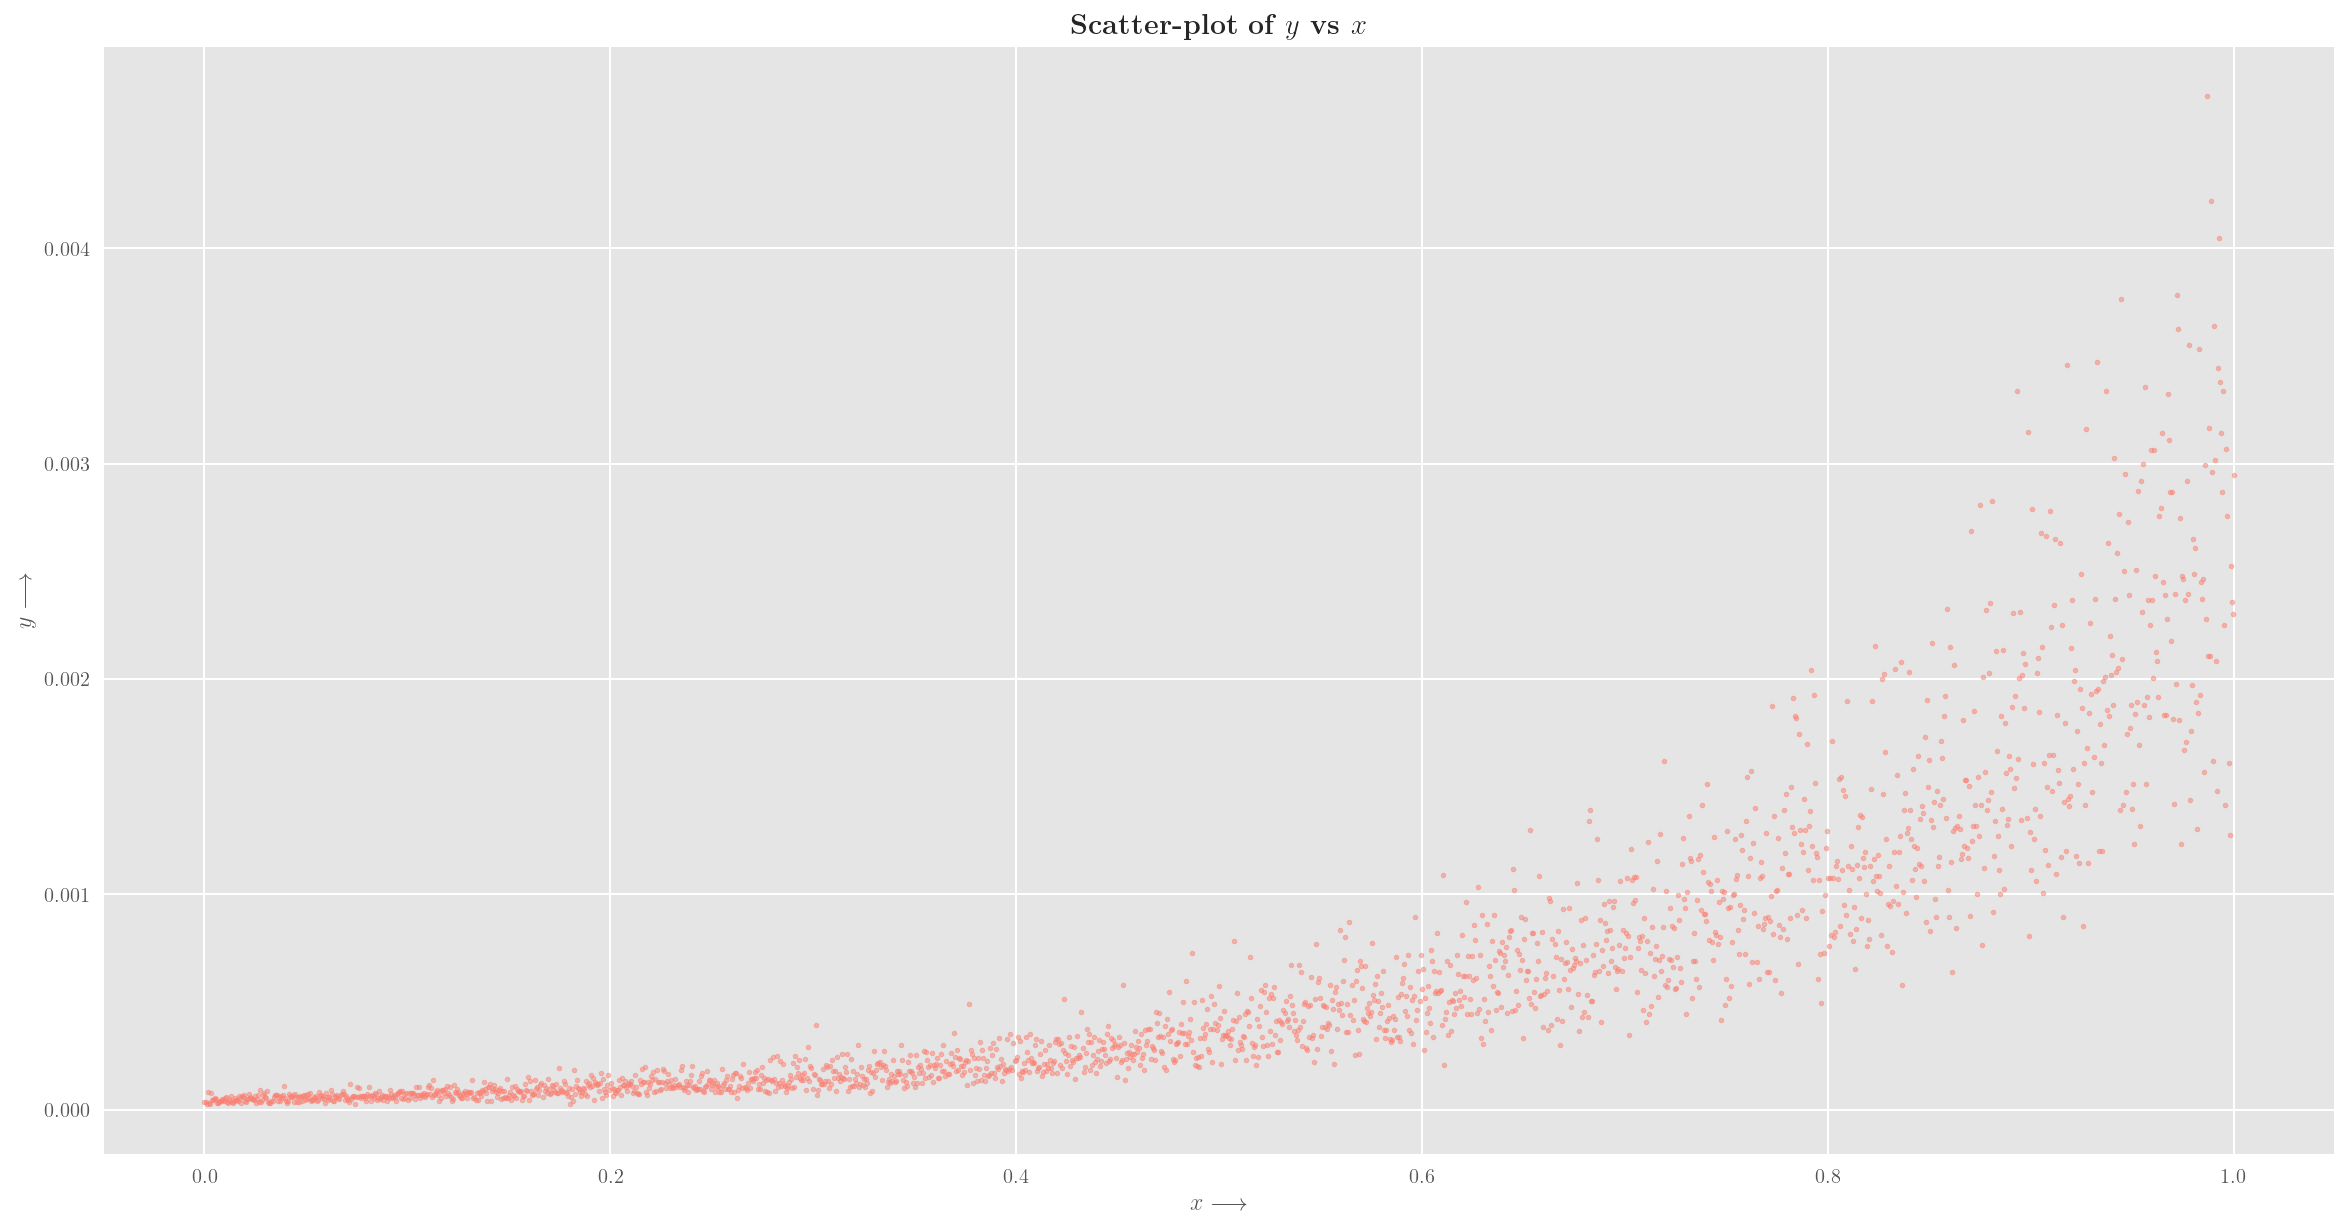

In [5]:
plt.scatter(data['x'], data['y'], alpha=0.5, s=5, color='salmon')
plt.title(r'\textbf{Scatter-plot of $y$ vs $x$}')
plt.xlabel(r'$x\longrightarrow$');
plt.ylabel(r'$y\longrightarrow$');

## Regression

While it is clear that will not have an optimal model with simple linear regression, let us go through the exercise nevertheless to get a baseline performance to improve upon.

## Data Preprocessing

Let us separate out the predictors from the response variable. Next, we will split the data into the test and train datasets.

In [6]:
X, y = data[['x']], data['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

## Build a linear regression model

Let us now build a regression model, and fit it to the dataset. 

In [8]:
model = LinearRegression();
model.fit(X_train, y_train);

Recall that a linear regression model is given by the equation:

\begin{equation} y =  \beta_0 + \beta_1 x + \epsilon\end{equation}

where:
$\epsilon$ is the irreducible error term, so that the model is essentially:

\begin{equation} \hat{y} =  \beta_0 + \beta_1 x \end{equation}

What values of $\beta_0$ (the intercept) and $\beta_1$ (the slope) is this model predicting? We can inspect this as follows:

In [9]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: -0.00038853535270420934, Slope: [0.00205415]


Look back at the data visualization, and see if this agrees with your own estimates.

## Predictions from the model

Now, let us use the model to make predictions on the **test** data, something the model has not seen so far. By comparing the predictions to the actual values, we will get a sense of how well the model has learned to generalize from the data. 


In [10]:
yhat = model.predict(X_test)
print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.00
Coefficient of Determination (R^2):0.6885325785576069


The coefficient of determination, $R^2$ indicates a dismal model! Should we plod on to the next step of model verification: namely the residual analysis.

## Residual Analysis



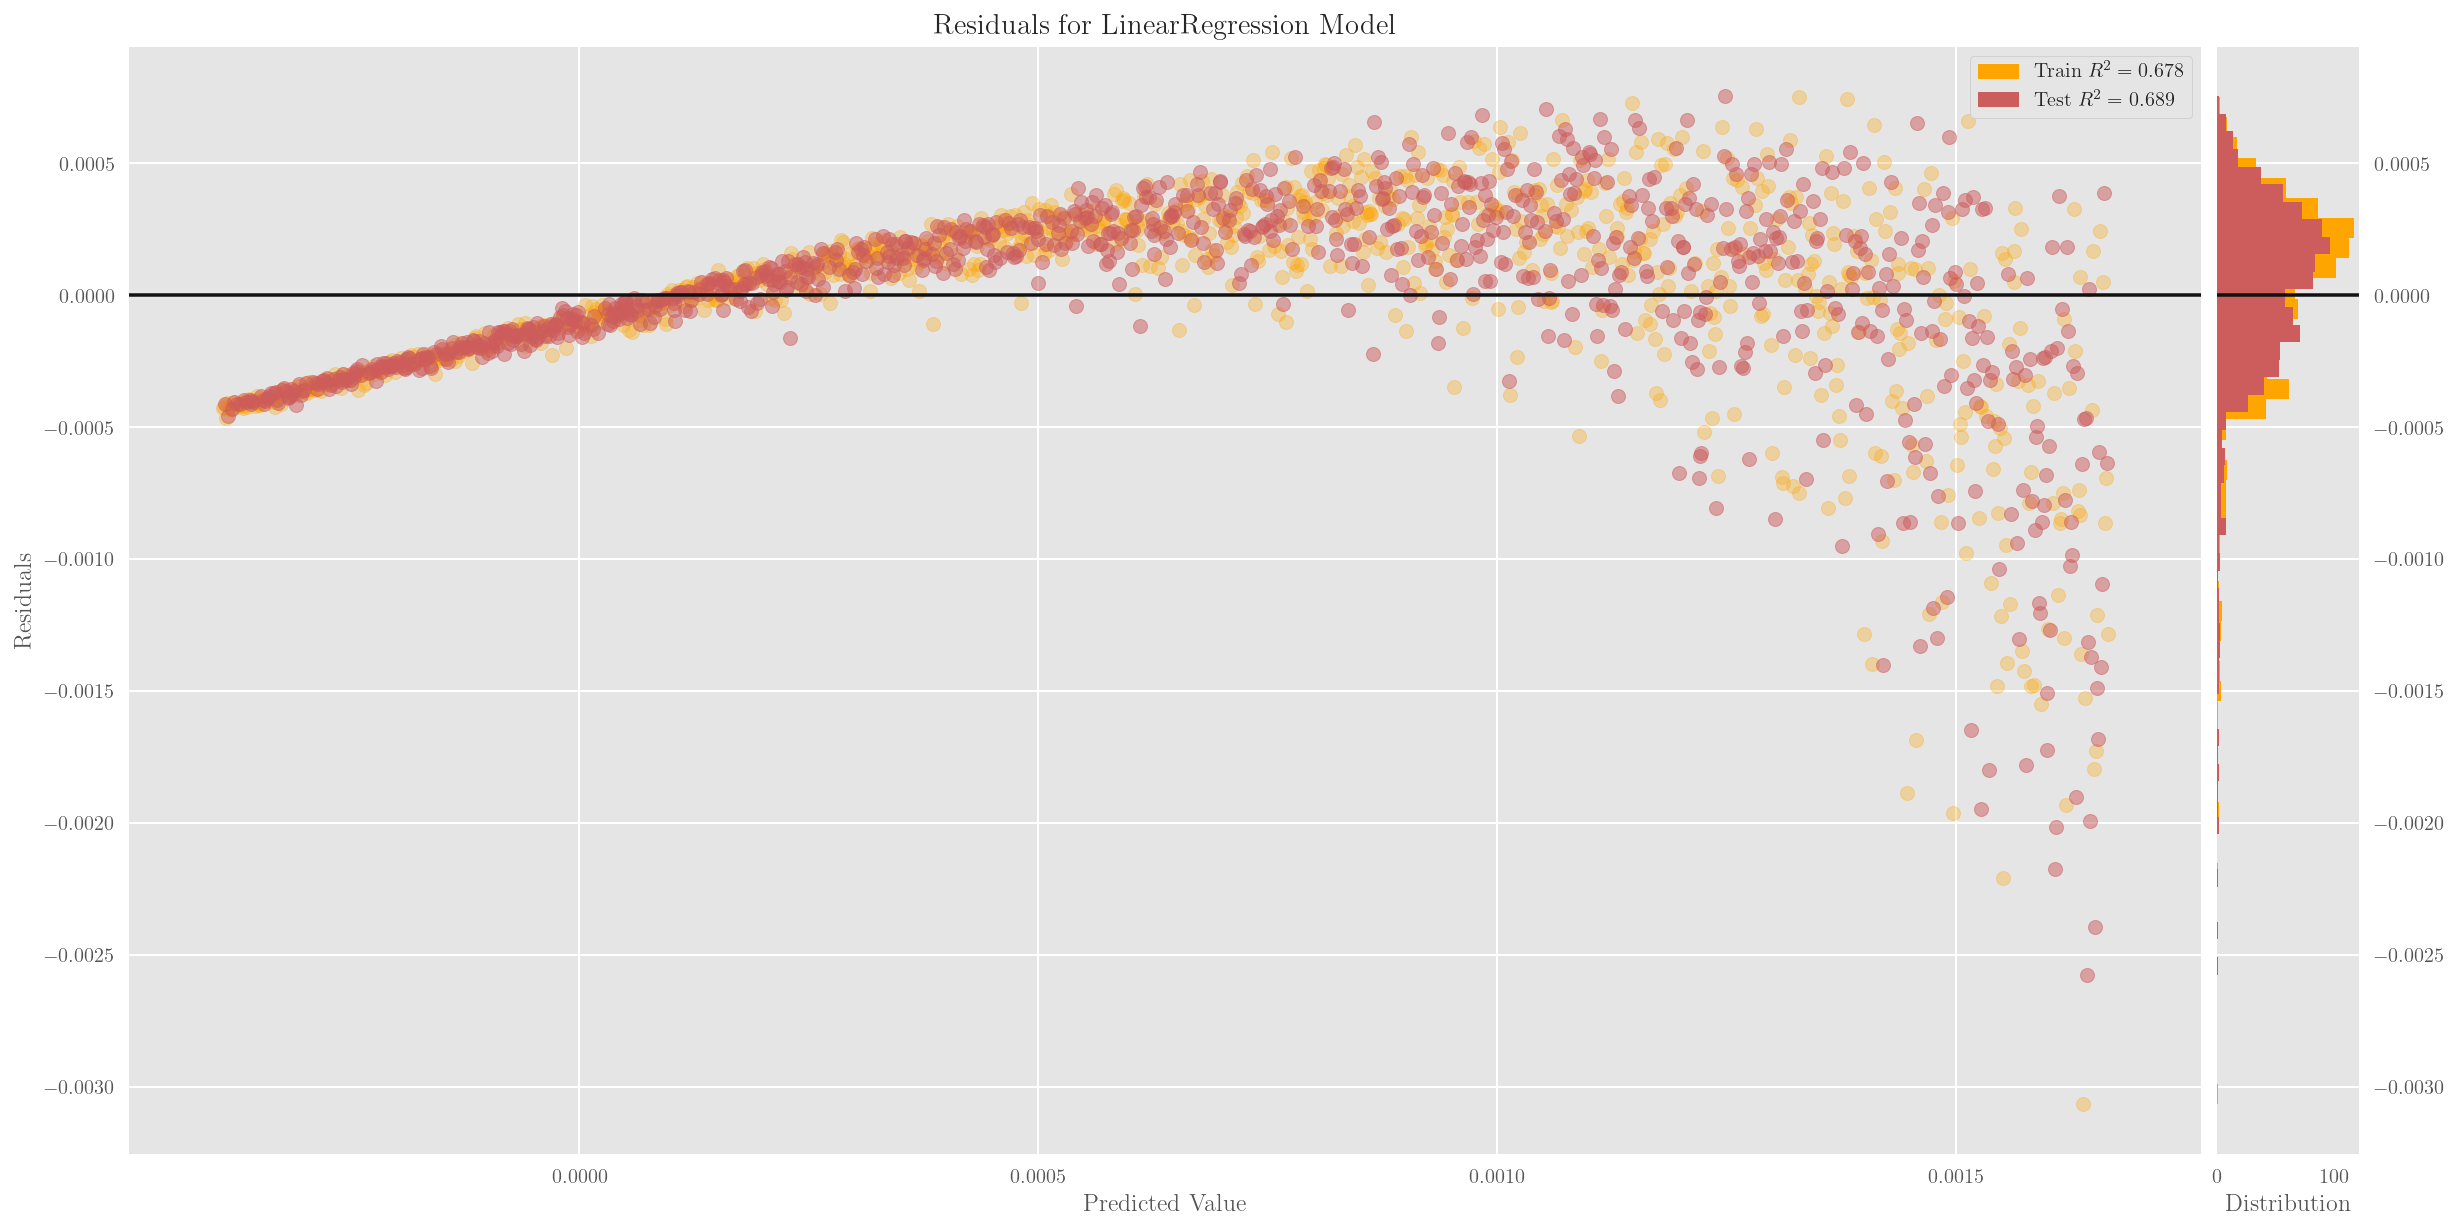

In [11]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_train, y_train, X_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

The residuals display a striking pattern, and heteroscedasticity. This is expected, given the inherent nonlinearity fo the data.

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

In [12]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(X)

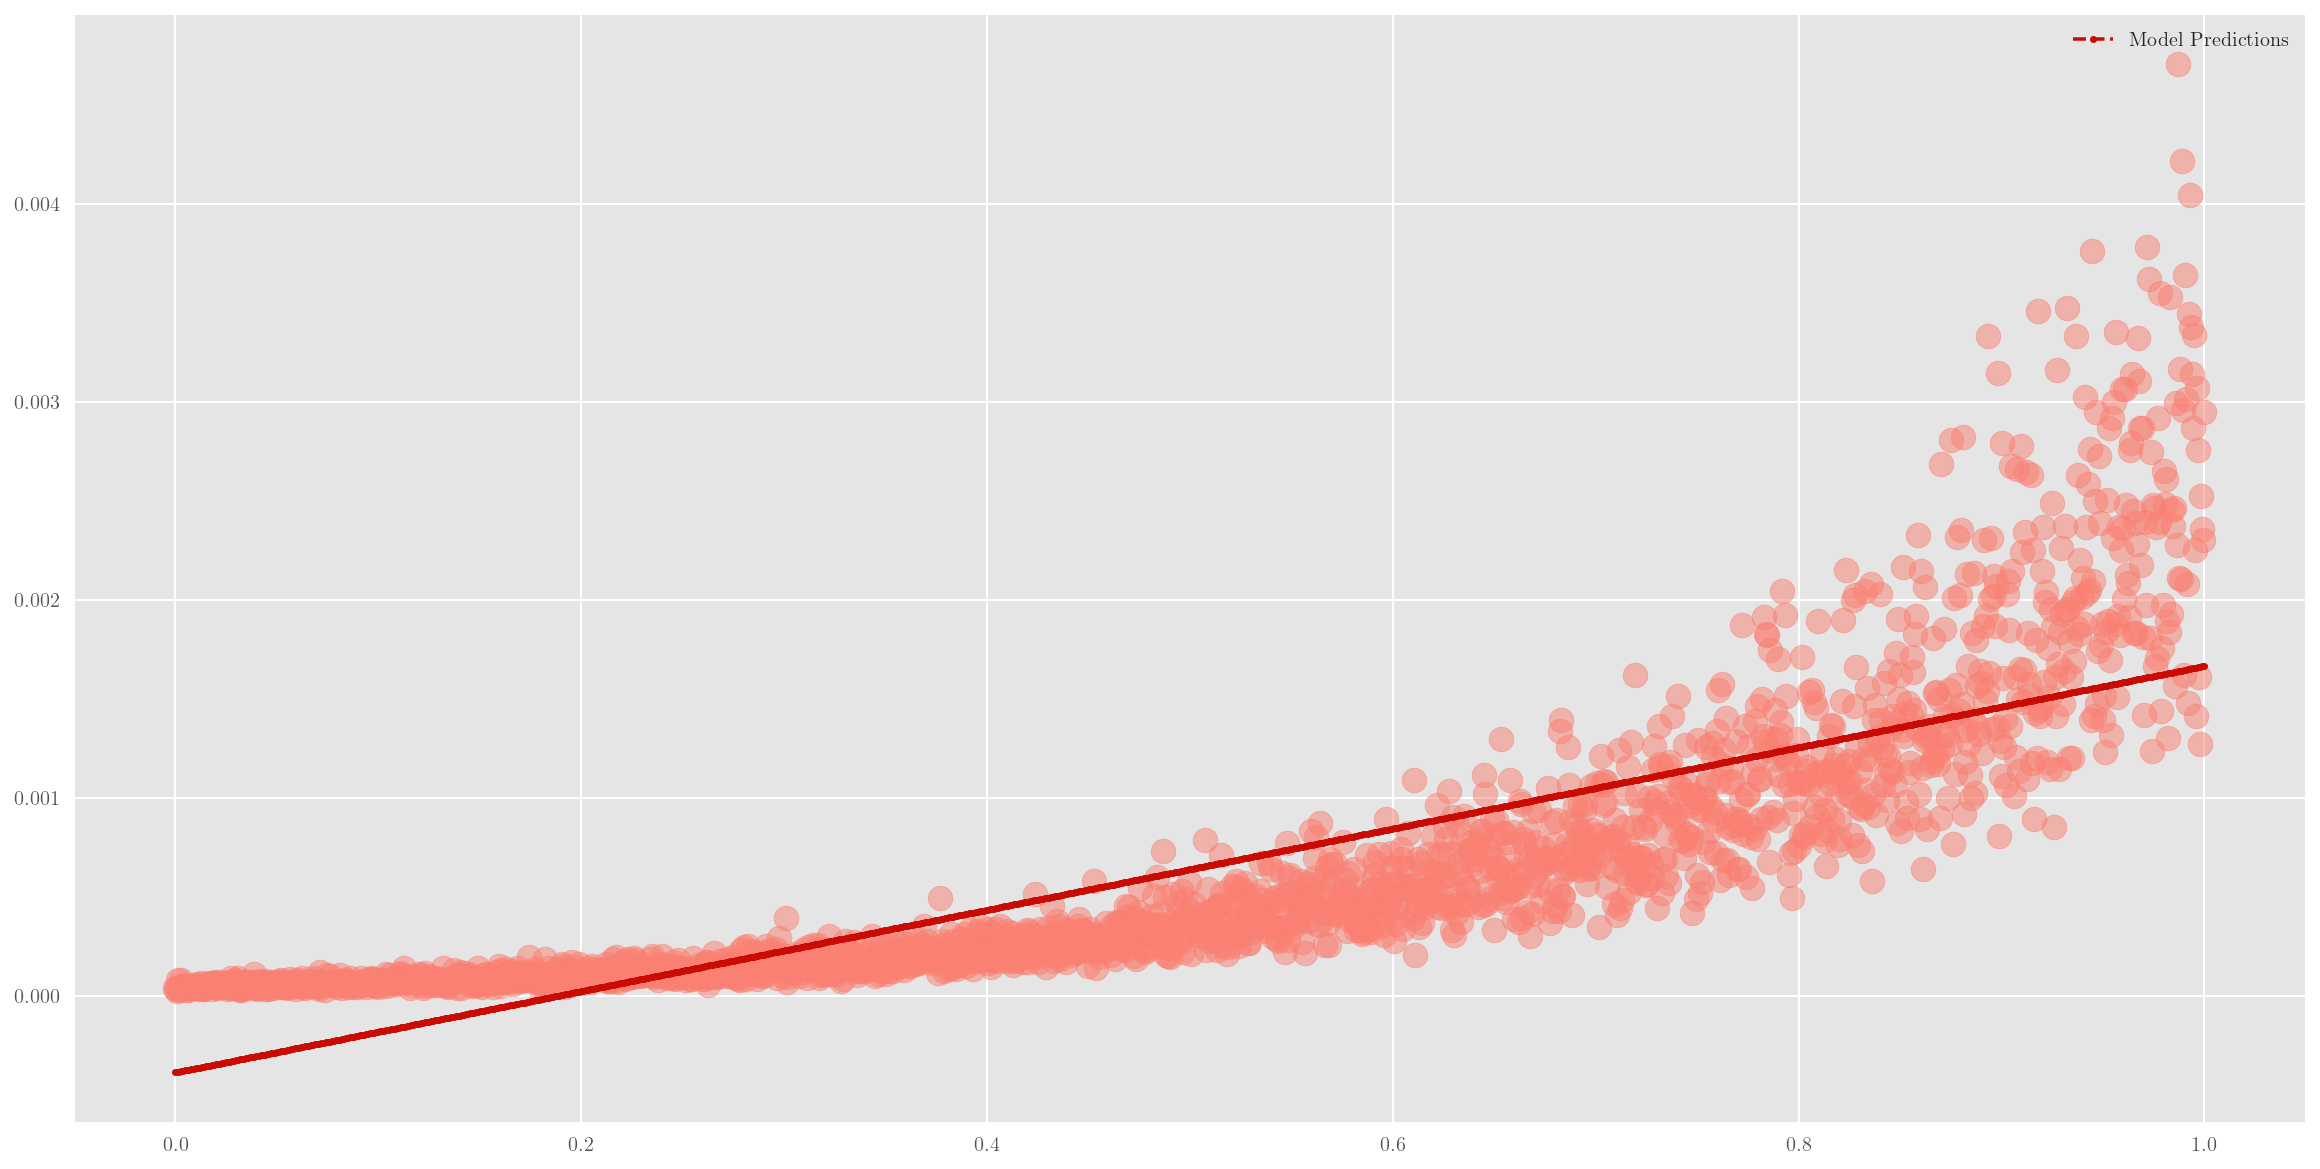

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

This simple linear model has, as one would have expected by now, leaves a lot of scope for further improvement.

## Polynomial Regression

The lesson from the prior notebooks is that adding polynomial features to the dataset, and then performing the regression can be an effective tool. Will this work here? Let's find out.

In the interest of brevity, we have merged the steps of:
* create polynomial degrees of the input
* fit a linear model to the data
* make predictions on test data
* print model diagnostics

In [14]:
degree     = 2
polynomial = PolynomialFeatures(degree)
X_poly = polynomial.fit_transform(X_train)
model = LinearRegression()
# Now, train the model
model.fit(X_poly, y_train)
print ("The cofficients: {}".format(model.coef_))
X_poly_test = polynomial.fit_transform(X_test)
yhat = model.predict(X_poly_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

The cofficients: [ 0.         -0.00162445  0.00371471]
Mean squared error: 0.00
Coefficient of Determination (R^2):0.8329503875681755


The coefficient of determination seems quite encouraging. Let us now proceed to the residual analysis.

## Residual Analysis

We will start by plotting the residuals from the predictions. Recall that the residual from the prediction $\hat{y}_i$ on a particular datum $(x_i, y_i)$ is defined as: 

\begin{equation}\mathbf{ r_i = \hat{y}_i  - y_i }\end{equation}

We will use the `yellowbrick` library for looking at the model characteristics.

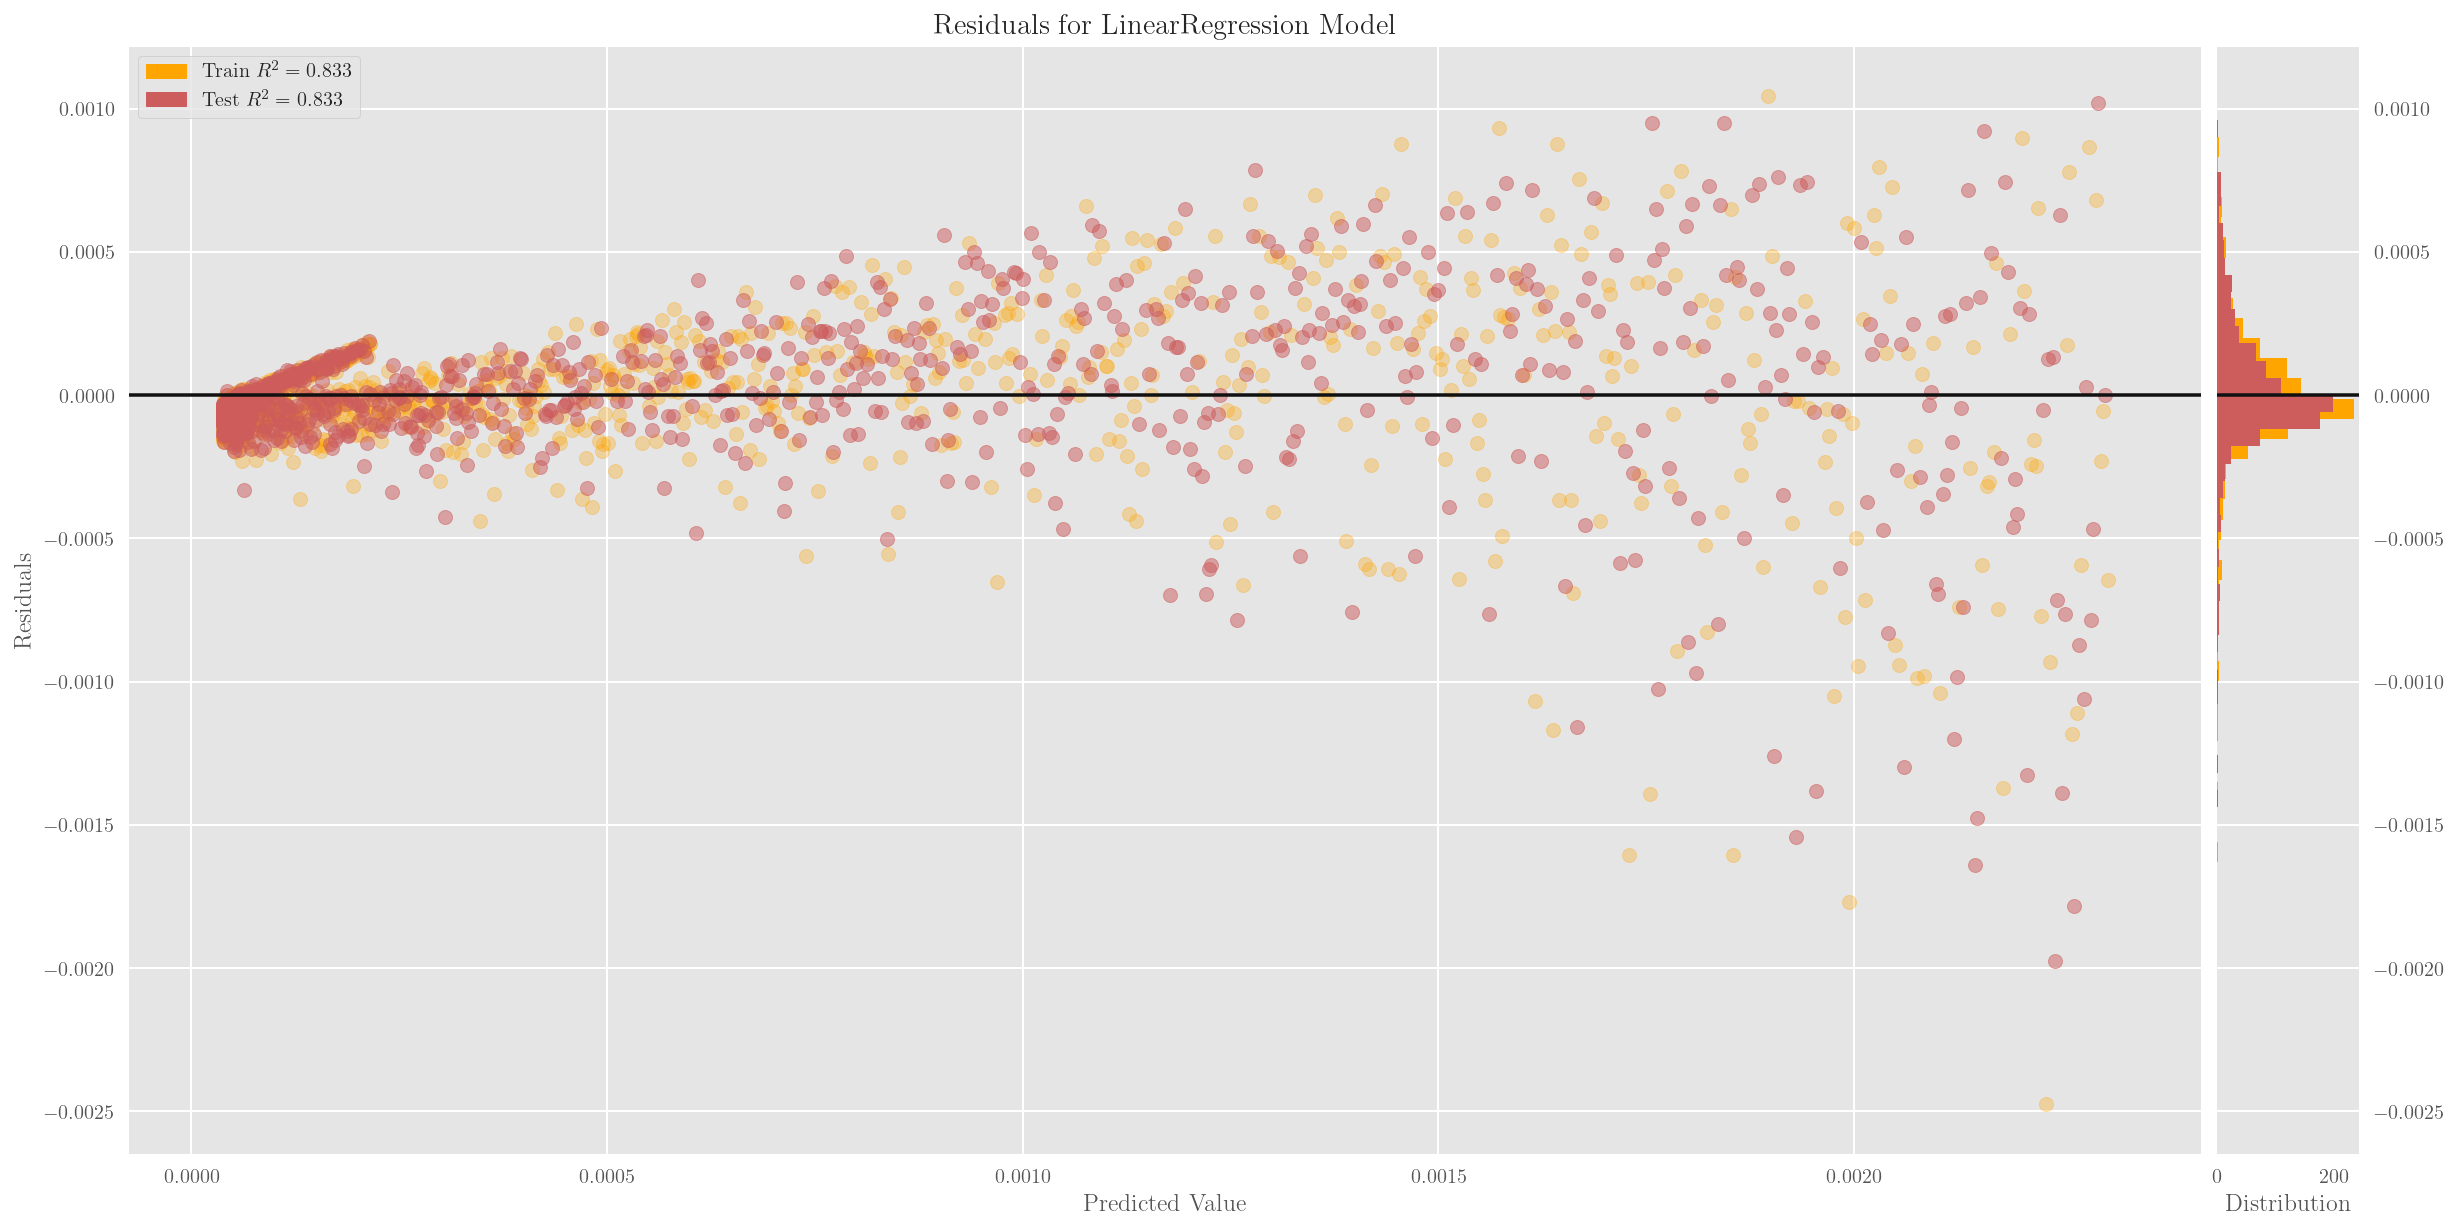

In [15]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(model, X_poly, y_train, X_poly_test, y_test, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

There is an interesting situation: even though the coefficient of determination has significantly improved, the residual plot still exhibits marked heterscedasticity, **which motivates us to look at power-transformations of the variable, so as to discover more appropriate derived features to model with.**

## Visualization of the model predictions

As a final step, let us visualize the predictions of the model, and superimpose it on the actual data. This should give us a sense of how well the model is working.

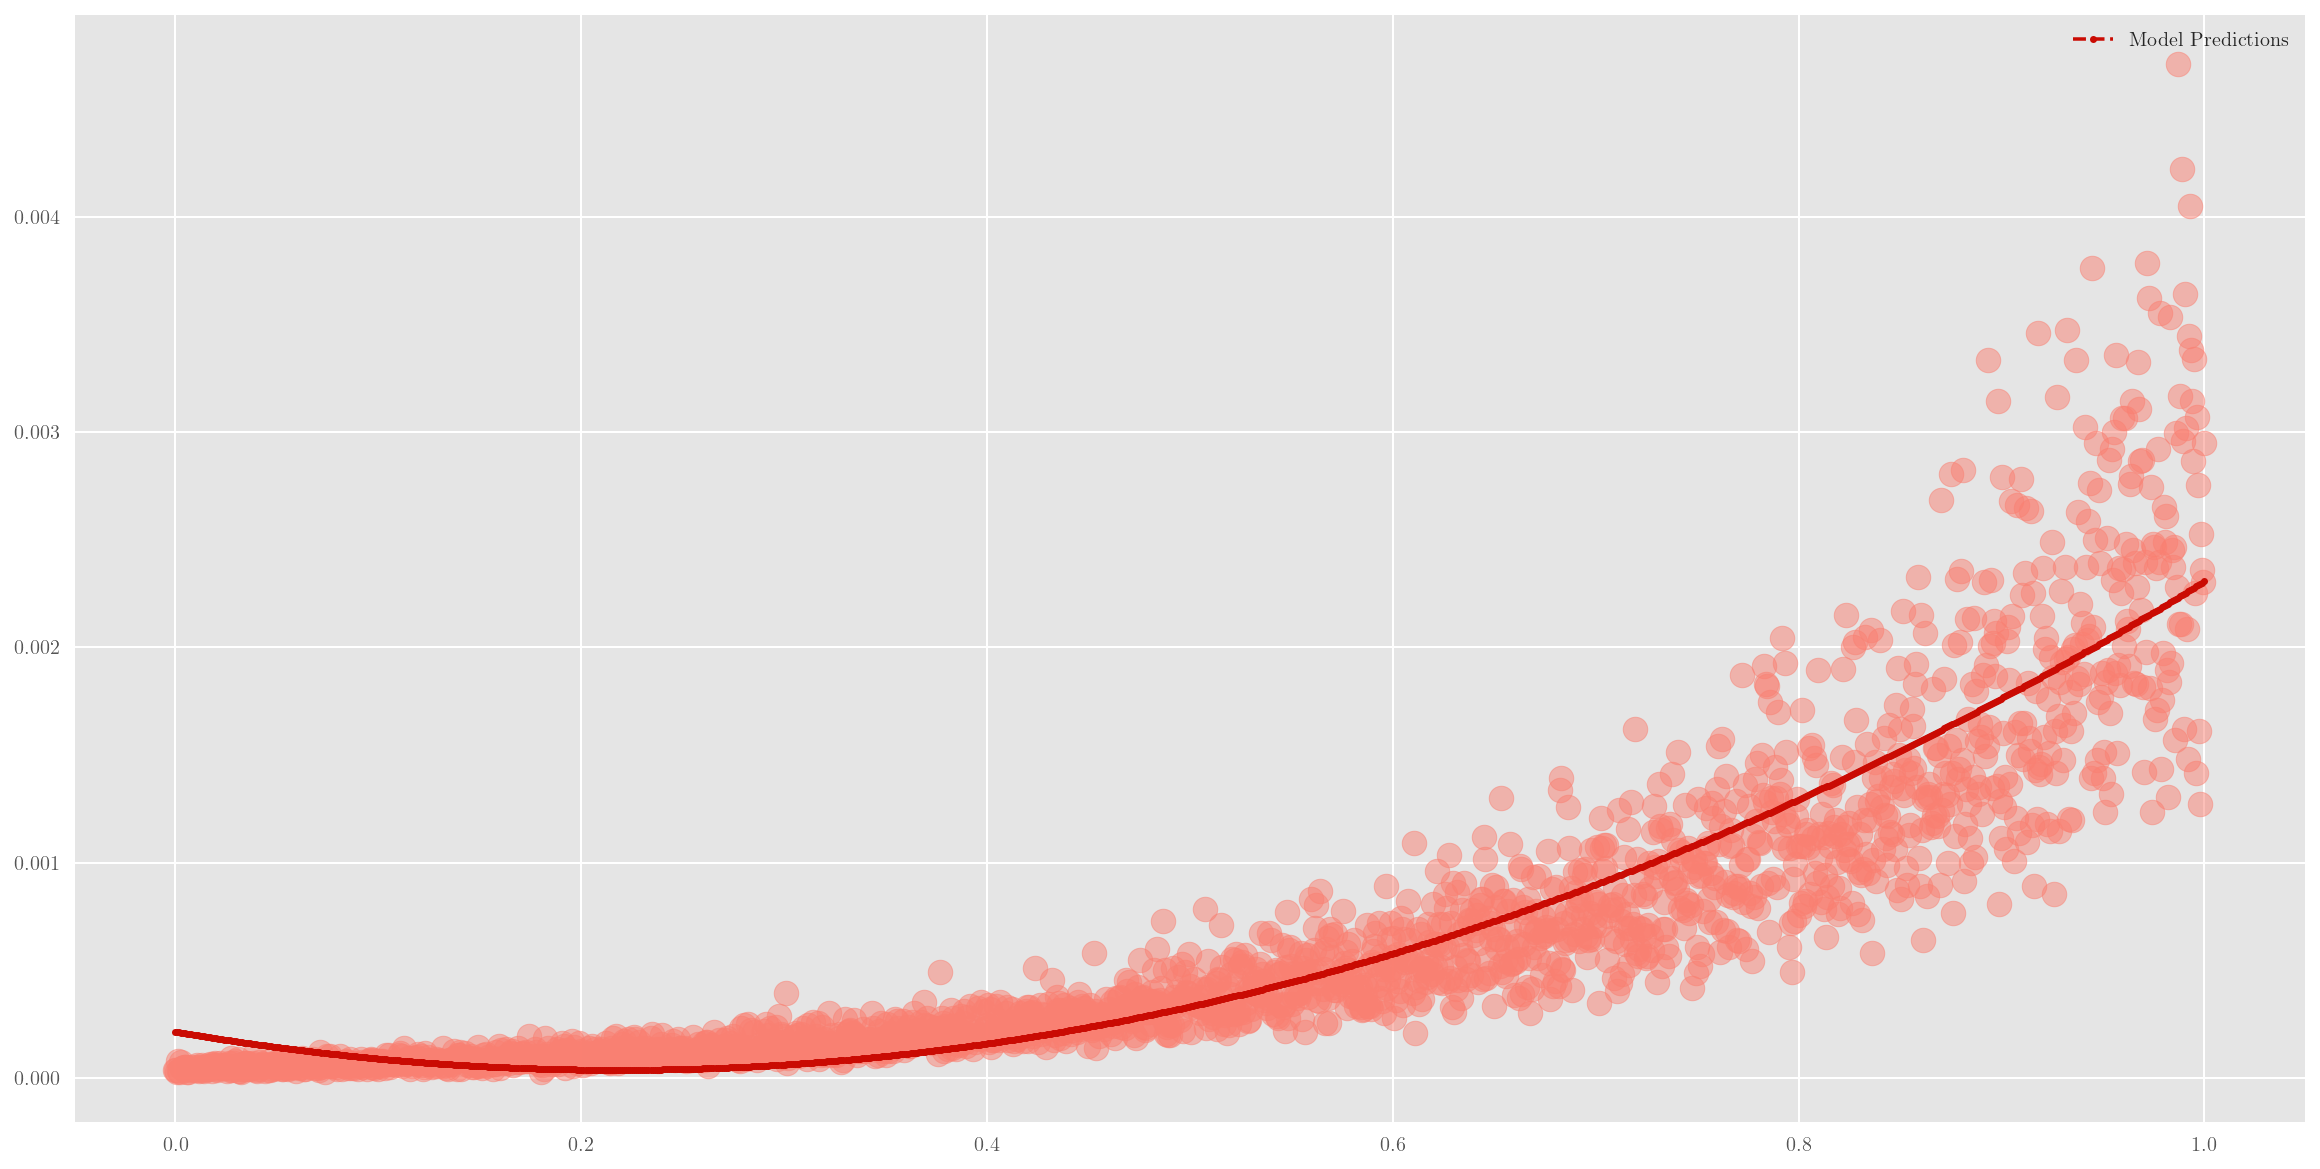

In [16]:
 
X = pd.DataFrame(data={'x': np.linspace(data.x.min(), data.x.max(), 1000)}) 
yhat = model.predict(polynomial.transform(X))

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(data['x'], data['y'], alpha=0.5, s=150, color='salmon')
ax.plot(X.x, yhat, 'r--.', label="Model Predictions")
ax.legend(loc='best');

A careful observation of the prediction curve confirms our belief that while it is a good rough approximation for some regions of the data, the underlying model is not the appropriate one.

# Power Transform

It is time now to see if a power-transformation on the variables would lead us to a better feature set for a predictive model.

We look for clues in the histogram of the features.

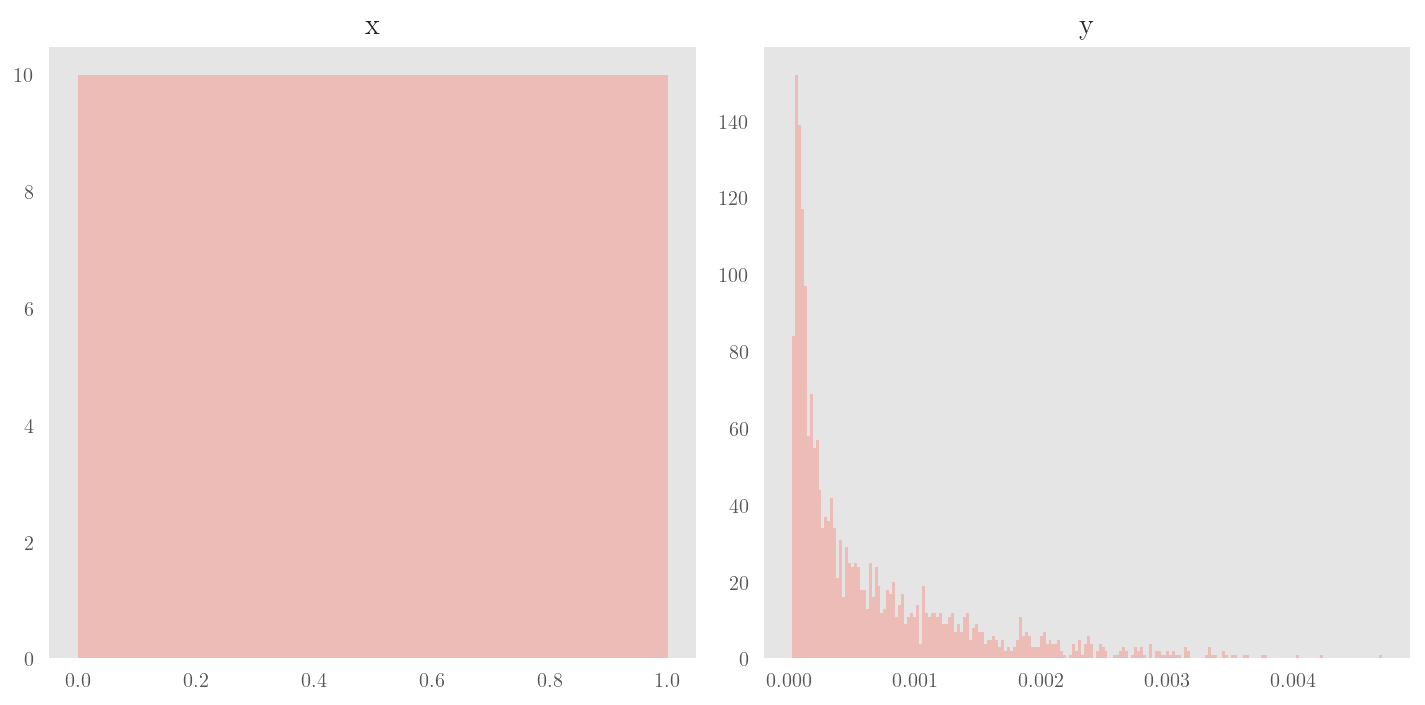

In [17]:
data.hist(bins=200, alpha=0.4, grid=False, color='salmon', figsize=(10,5))
plt.tight_layout();

The histogram for $x$, on the left, shows a uniform distribution. The histogram for  $y$, on the right, shows a pronounced right skew. This very skewed data so significantly departs from a normal distribution, that there is no further need to do a normality check to ascertain that it is not normal.

Therefore, let us subject $y$ to a power transformation.

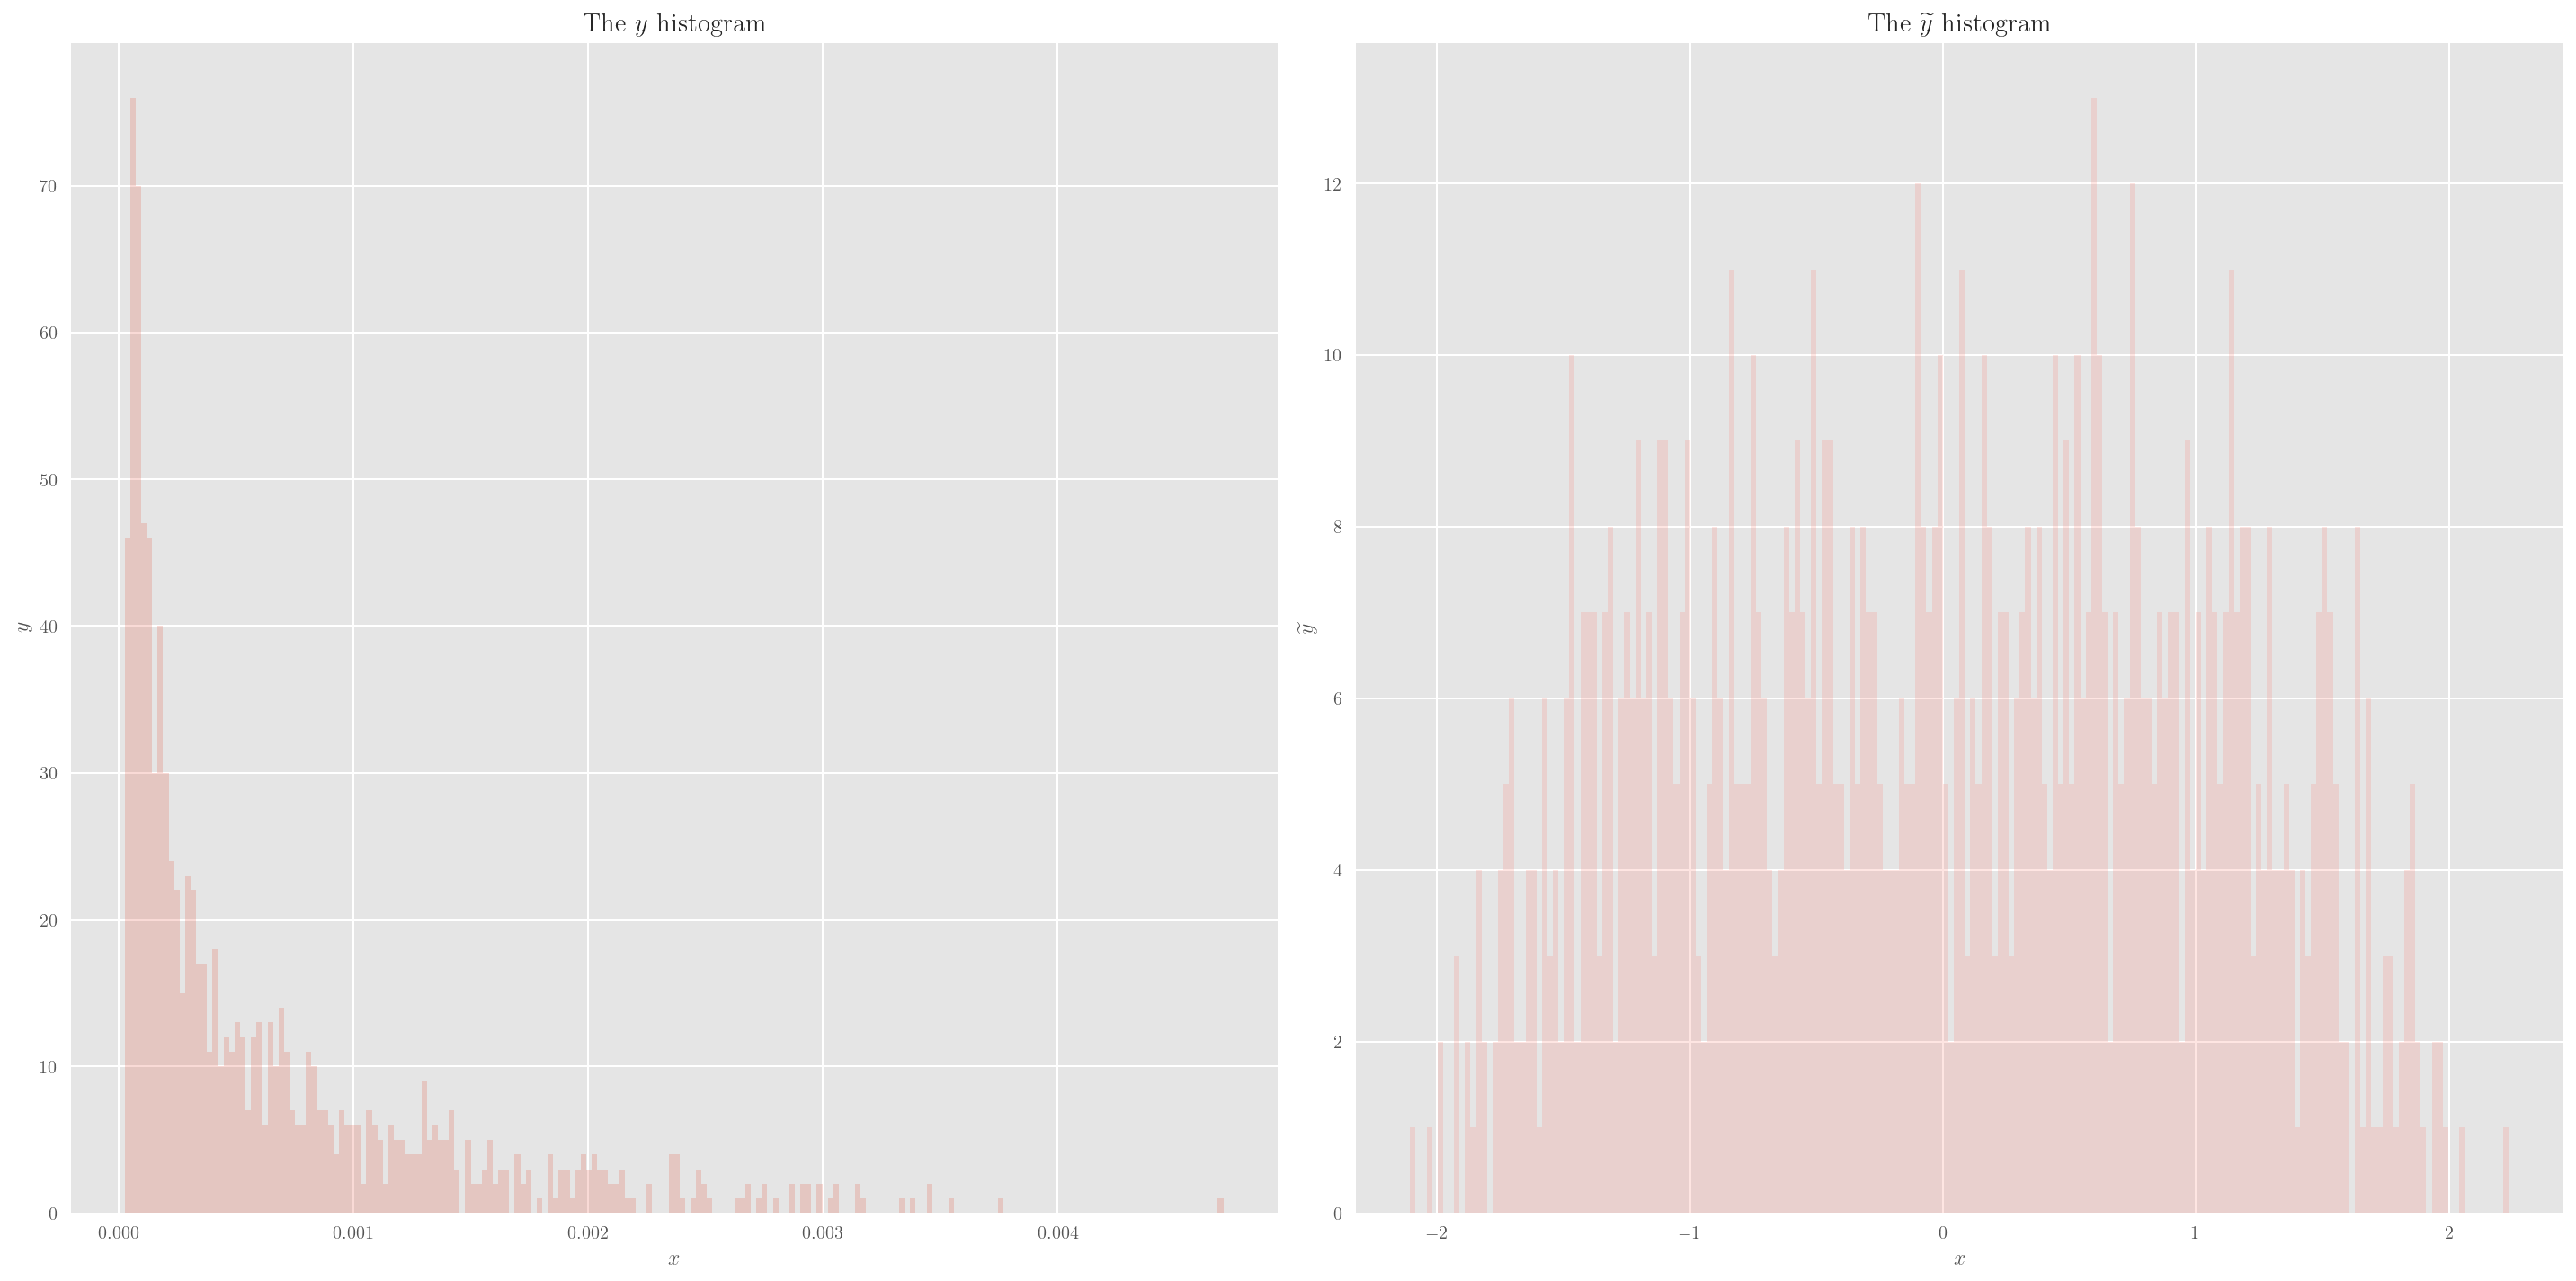

In [18]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox')
yt = y_train.values.reshape(-1,1)
ỹ = power.fit_transform(yt)


fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(y_train, bins=200, alpha=0.2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.title.set_text(r'The $y$ histogram')

ax2.hist(ỹ,bins=200, alpha=0.2, color='salmon')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\widetilde{y}$');
ax2.title.set_text(r'The $\widetilde{y}$ histogram')
fig.tight_layout()

This power transformation on $y$ to $\widetilde{y}$ has now produced a feature that more closely approximates a normal distribution. Let us now inspect what the Box-Cox transformation is saying.

In [19]:
power.lambdas_

array([0.01196385])

The  value of the $\lambda$ in the Box-Cox equation has emerged as a value very close to zero. This indicates that the appropriate transformation needed is the log of the response variable $y$.

Let us plot the transformed data, and see what it looks like.

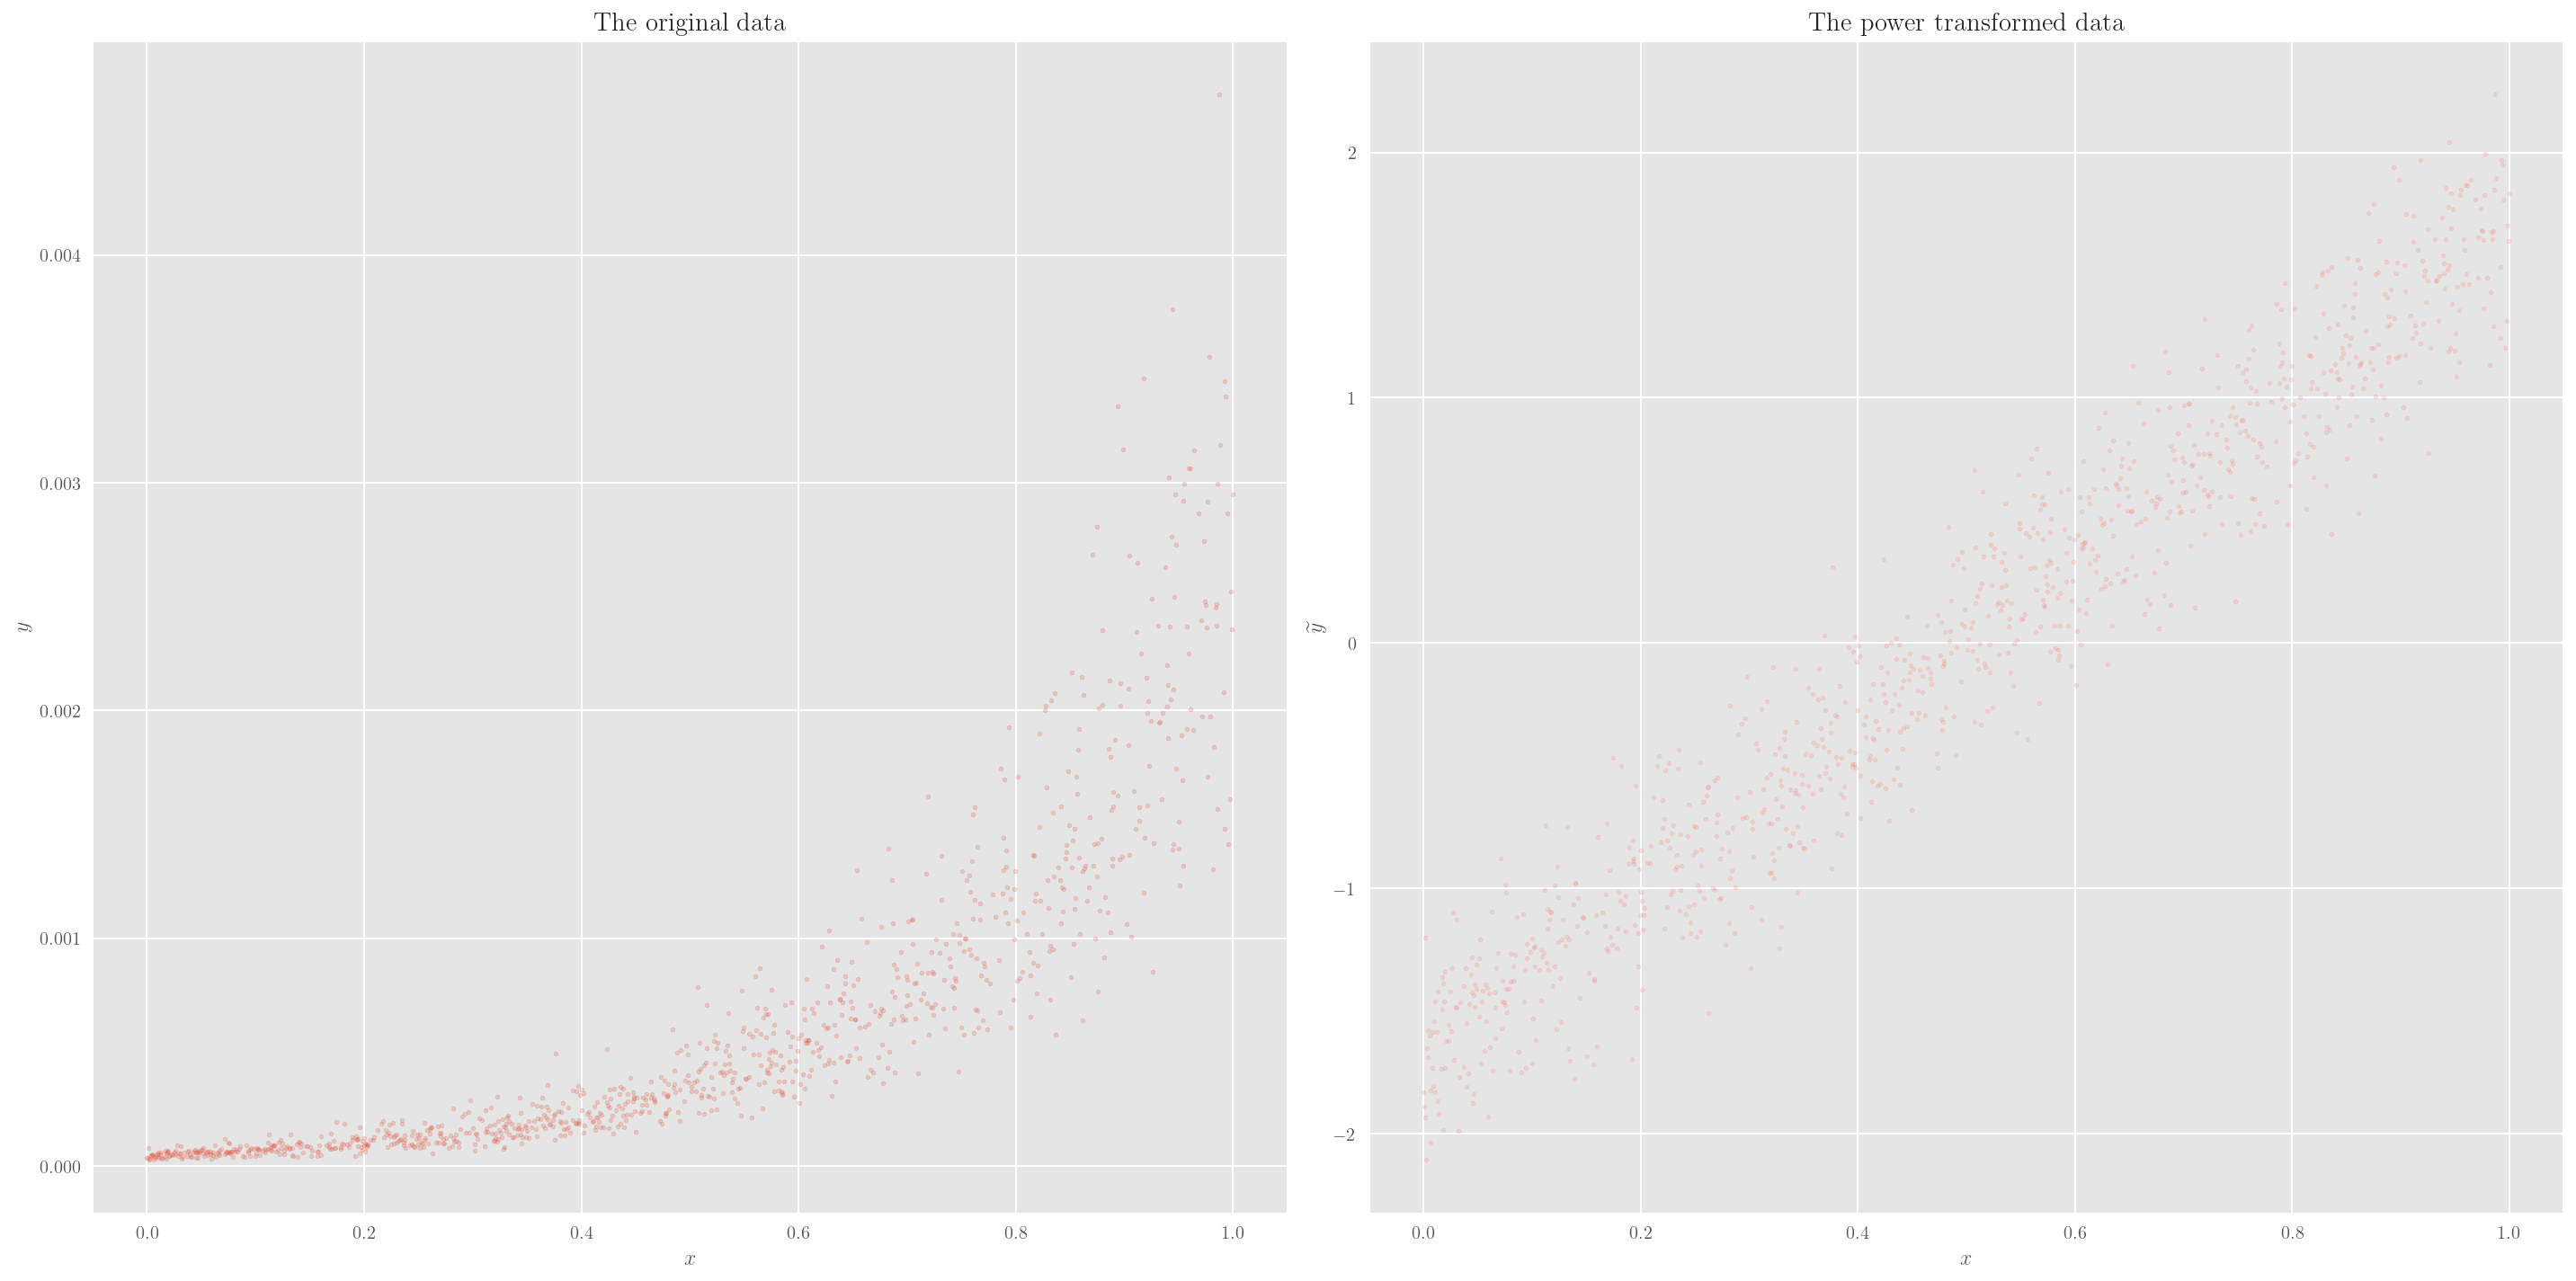

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(X_train.x,y_train, alpha=0.2, s=5)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.title.set_text(r'The original data')

ax2.scatter(X_train.x,ỹ,alpha=0.2, s=5, c='salmon')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\widetilde{y}$');
ax2.title.set_text(r'The power transformed data')
fig.tight_layout()

In [21]:
model = LinearRegression();
model.fit(X_train, ỹ);

In [22]:
print (f'Intercept: {model.intercept_}, Slope: {model.coef_}')

Intercept: [-1.68513752], Slope: [[3.37121271]]


In [23]:
pred = model.predict(X_test)

# Now, we need to do an inverse transformation to recover the actual prediction
yhat = power.inverse_transform(pred)


print("Mean Squared Error: %.2f"
      % mean_squared_error(y_test, yhat))
r2 = r2_score(y_test, yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.00
Coefficient of Determination (R^2):0.8525448141790826


The results are quite encouraging. It is time to proceed with the residuals analysis.

## Residual analysis

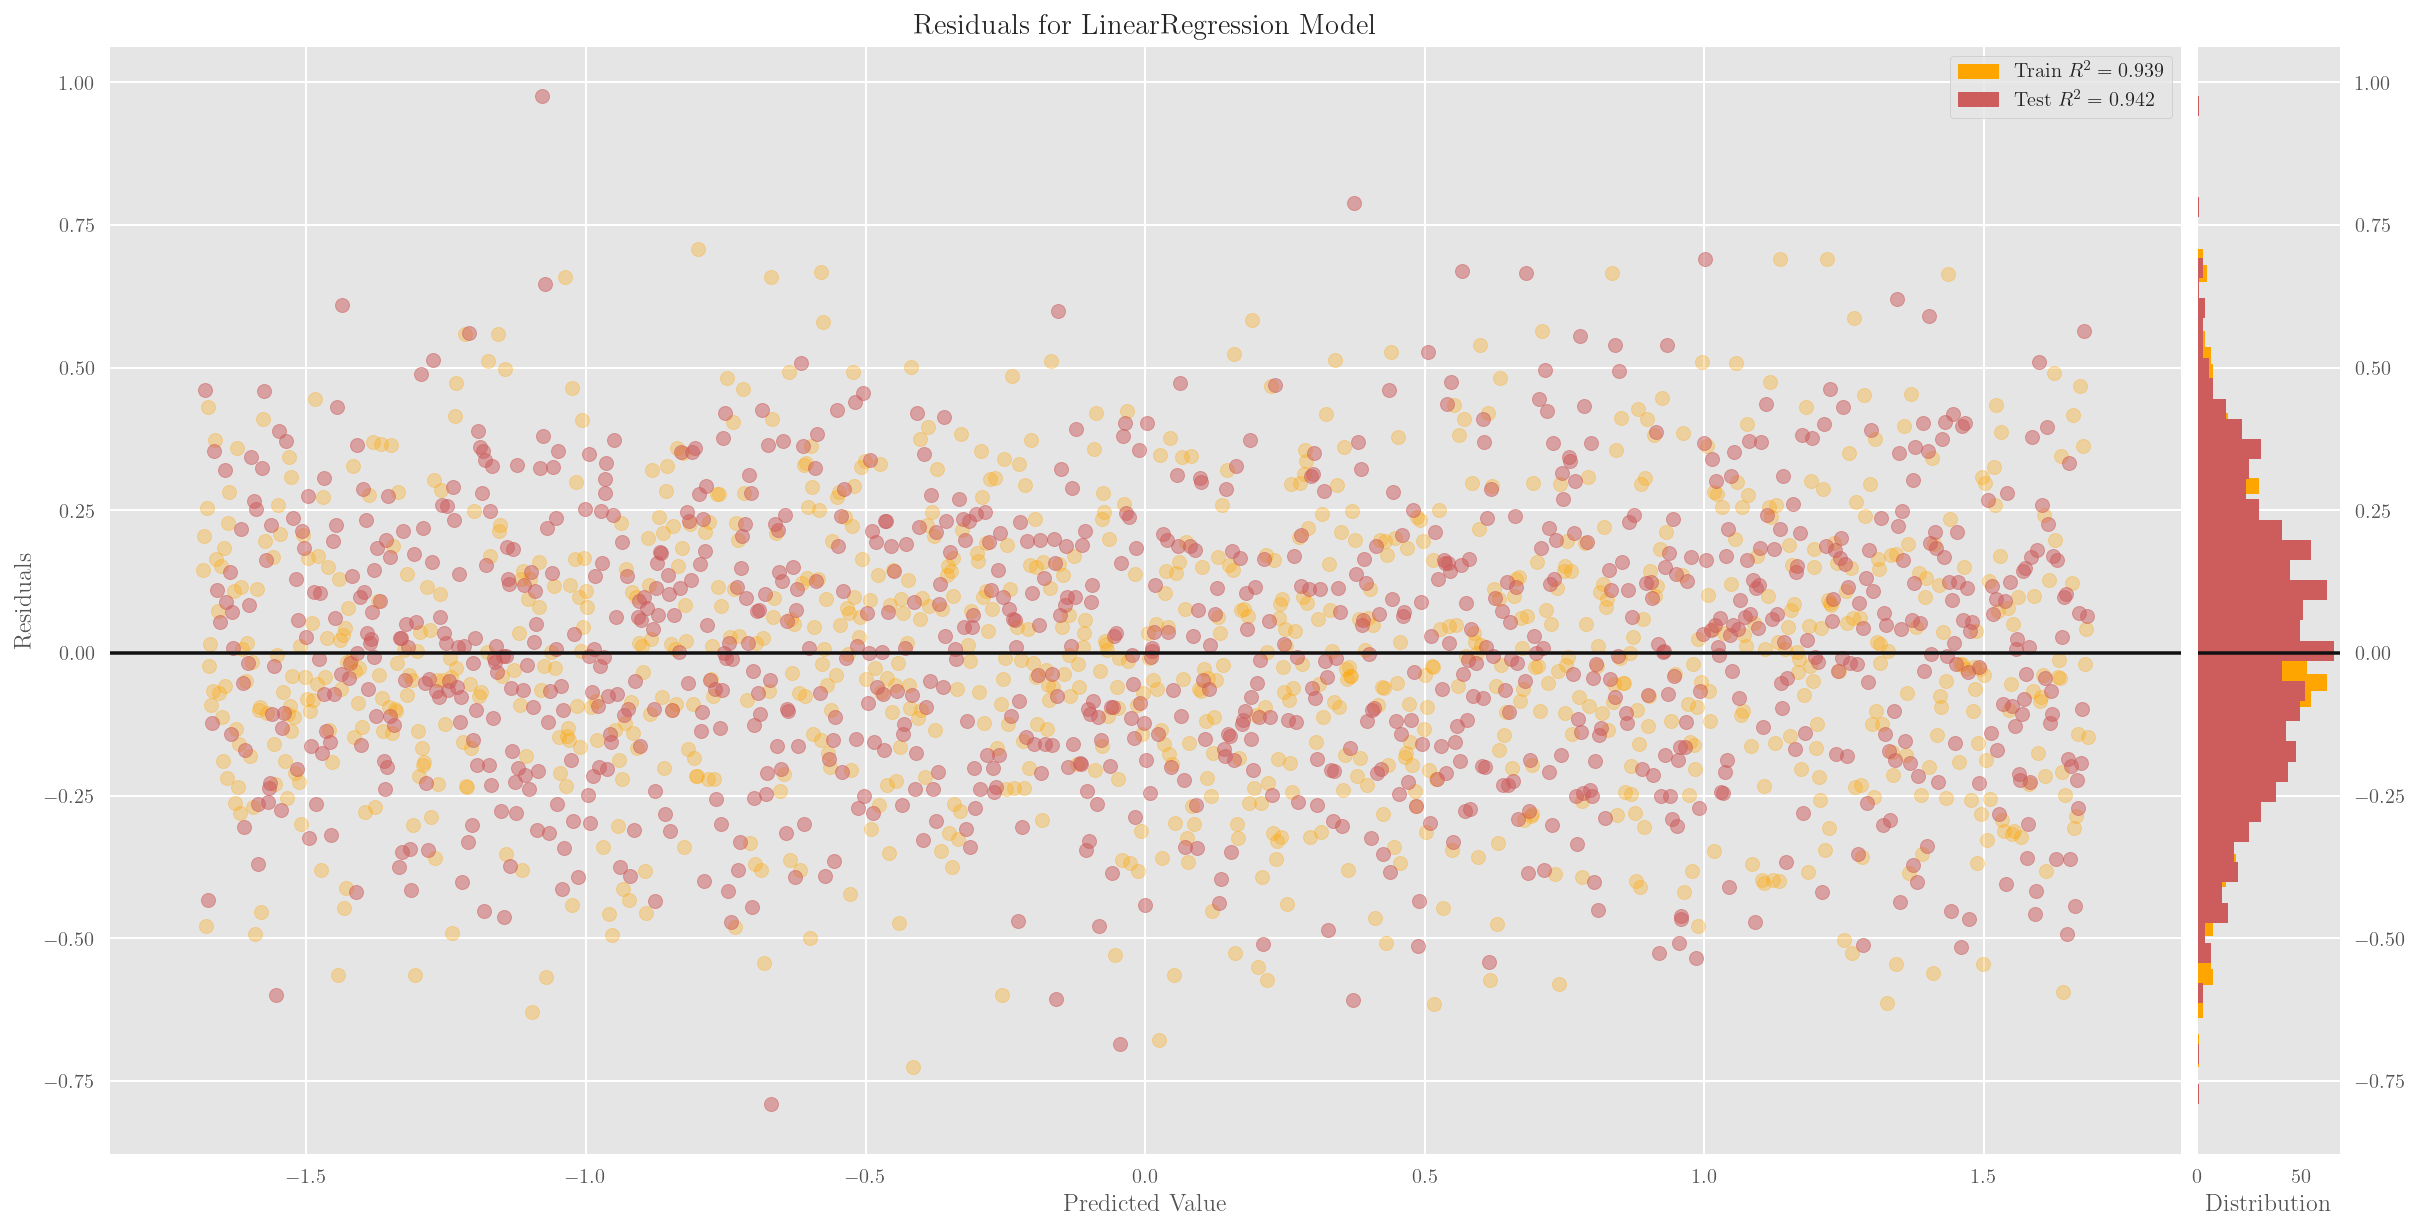

In [24]:
from yellowbrick.regressor import residuals_plot
y_test_trans = power.transform(y_test.values.reshape(-1,1))
viz = residuals_plot(model, X_train, ỹ, X_test, y_test_trans, 
                     train_color='orange', test_color='IndianRed', train_alpha=0.3, test_alpha=0.5)

From the left plot, we see homoscedasticity of the residuals, and from the right plot, we see that it is normally distributed. These are indicative that we may have now extracted the right features for modeling using the power tranformation. Let us continue on the plot the predictions over the data.

# Log transformation is NOT always right!
There is a common misconception that if we see a pronounced skew in a variable's histogram, then taking a log transformation is the appropriate measure. In the previous example, we saw that it works. However, this is not always the case: one must follow the rigorous process we have followed so far to find the appropriate power tranformation.


This dataset will illustrate this fact. In the interest of brevity, we have skipped the simple linear regression and polynomial regression models: it is left as an exercise for you to verify that both of these lead to unsatisfactory results. 

## pow_trans dataset

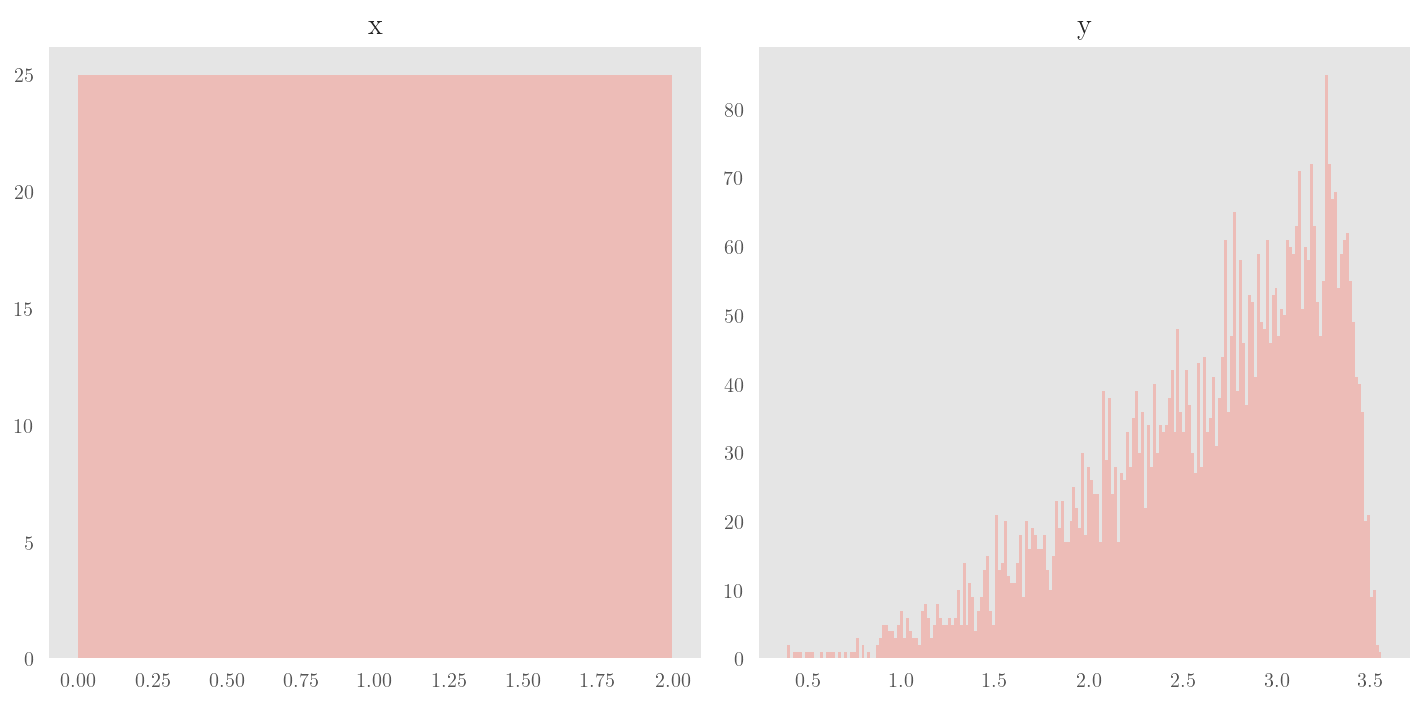

In [25]:
data = pd.read_csv('https://raw.githubusercontent.com/supportvectors/ml-100/master/pow_trans.csv')

X, y = data[['x']], data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,train_size=0.5)

data.hist(bins=200, alpha=0.4, color='salmon', grid=False, figsize=(10,5))
plt.tight_layout();

From this we notice that the target variable displays a strong skew in its histogram. Let us consider the default power transform method.

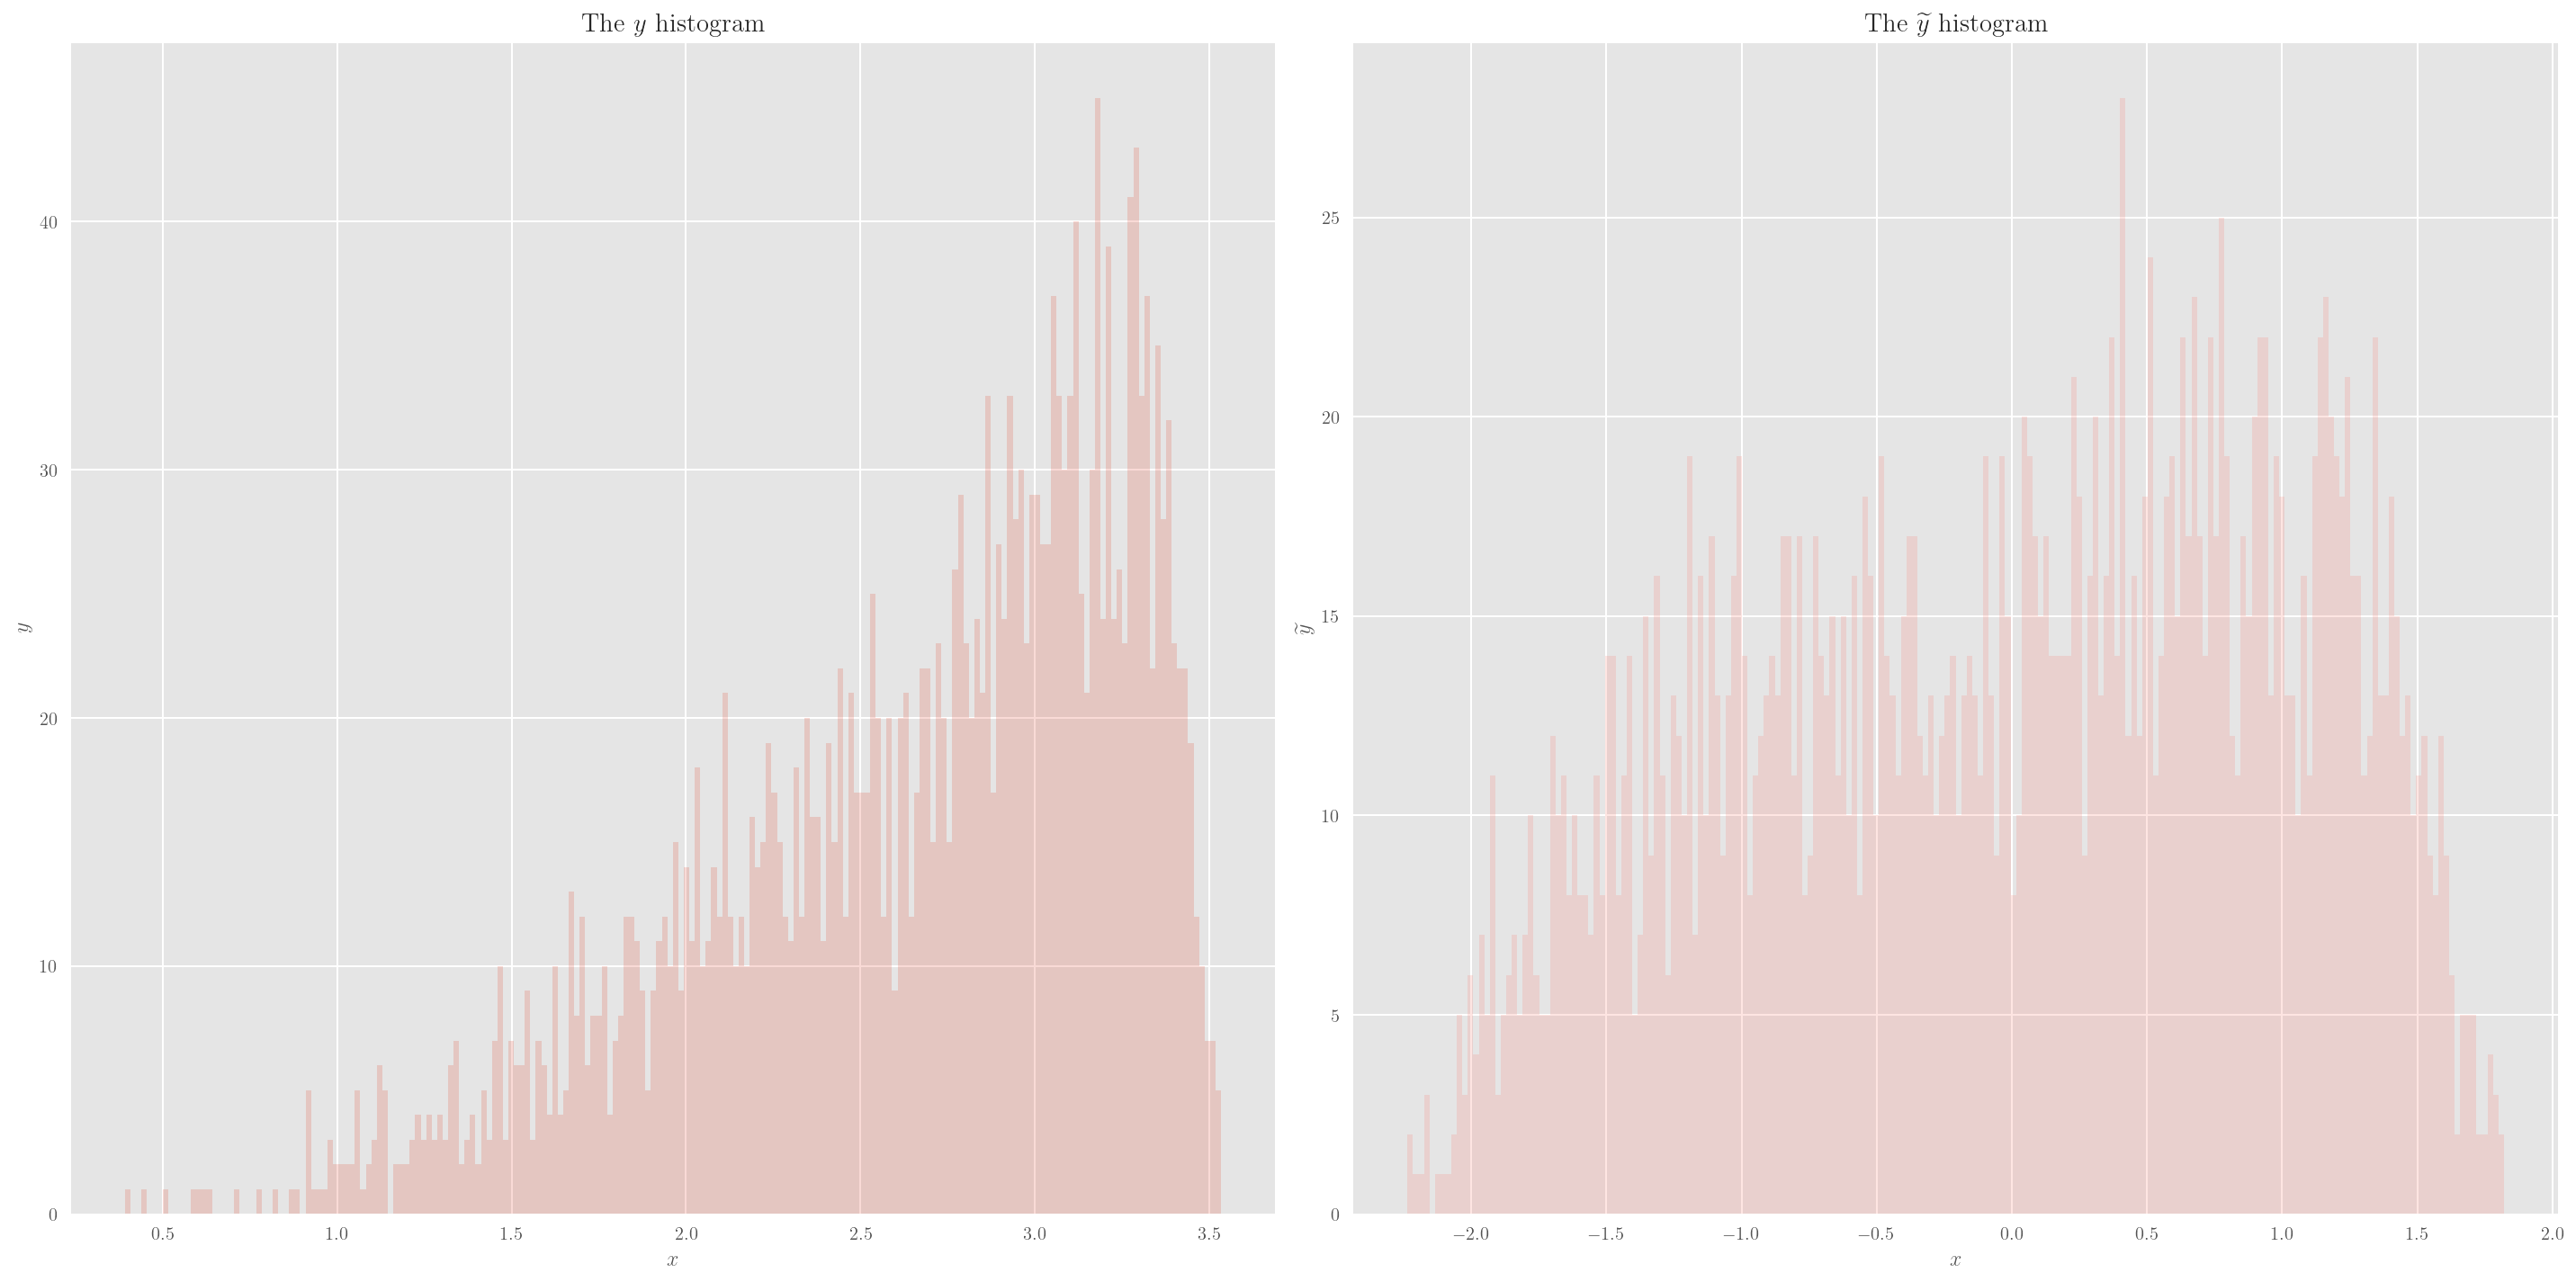

In [26]:
power = PowerTransformer()
yt = y_train.values.reshape(-1,1)
ỹ = power.fit_transform(yt)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(y_train, bins=200, alpha=0.2)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.title.set_text(r'The $y$ histogram')

ax2.hist(ỹ,bins=200, alpha=0.2, color='salmon')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\widetilde{y}$');
ax2.title.set_text(r'The $\widetilde{y}$ histogram')
fig.tight_layout()

In [27]:
power.lambdas_

array([3.00004149])

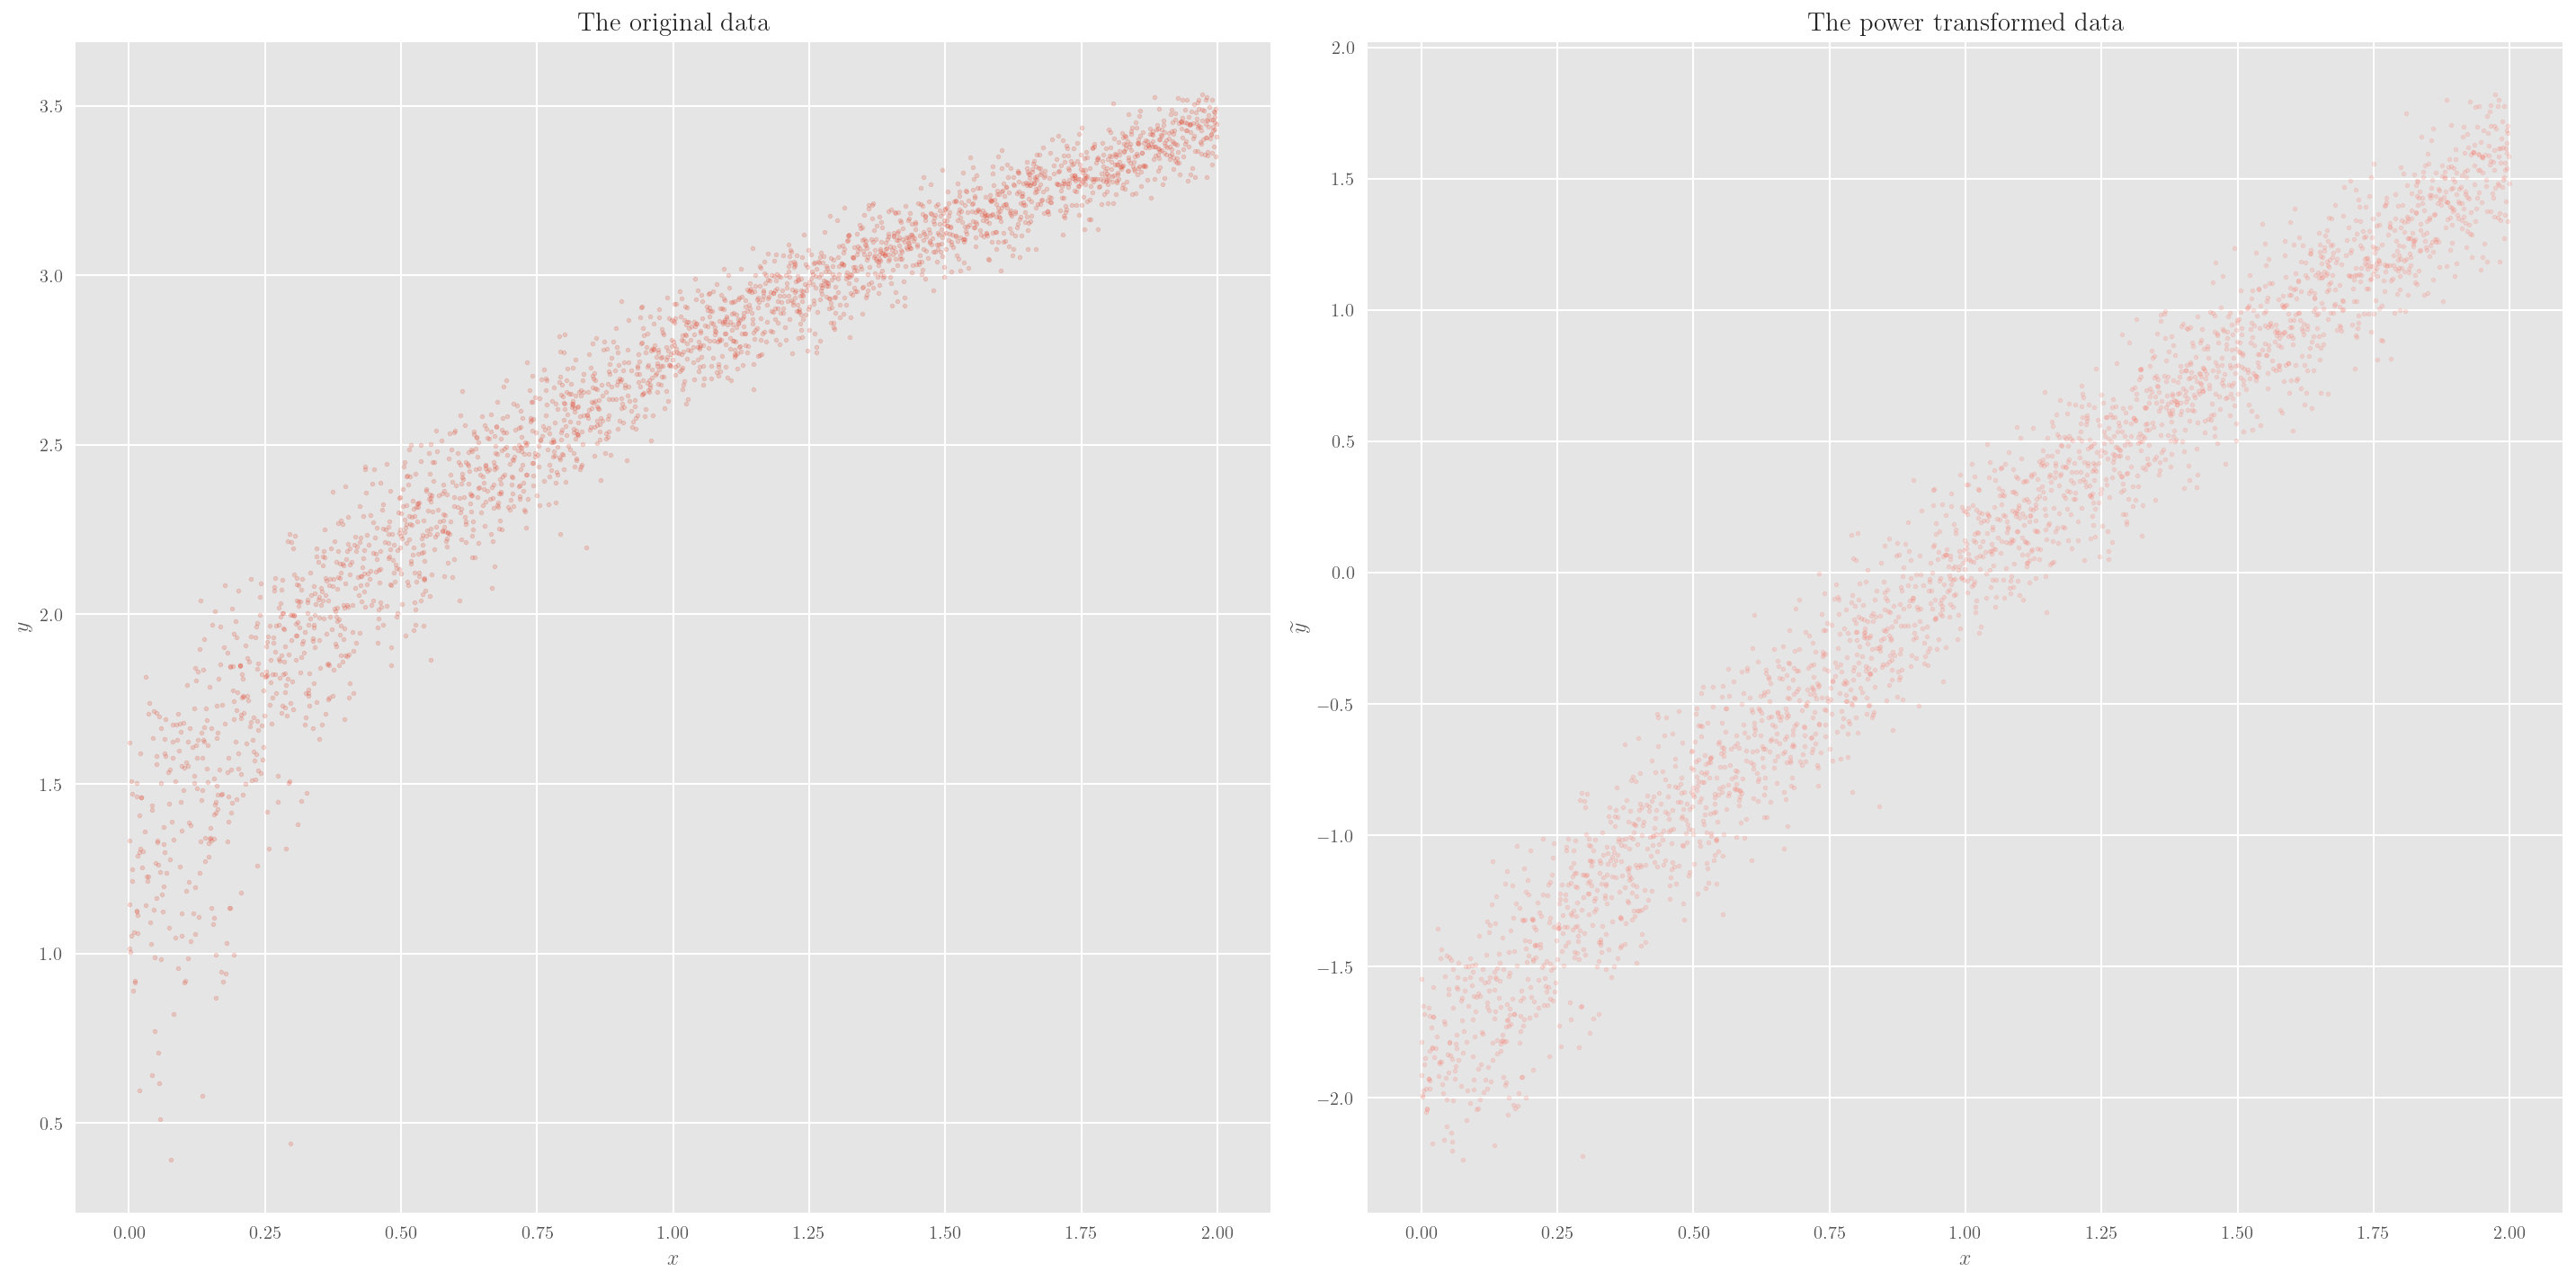

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(X_train.x,y_train, alpha=0.2, s=5)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.title.set_text(r'The original data')

ax2.scatter(X_train.x,ỹ,alpha=0.2, s=5, c='salmon')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\widetilde{y}$');
ax2.title.set_text(r'The power transformed data')
fig.tight_layout()

For the figure on the left where $y$ is plotted against $x$, observe:
* the distinct nonlinearity of the relationship
* presence of heteroscadasticity in the $y$ values

In contrast, for the figure on the right, where the power transformed version $\widetilde{y}$ is plotted against $x$, observe:
* the approximate linearity of the relationship
* homoscedasticity in the transformed $\widetilde{y}$ values

From the above, it seems that the relevant relationship between $x$ and $y$ can be written as:

$$ y^3 = \beta_0 + \beta_1 x + \epsilon$$

where $\epsilon $ stands for the normal errors. **In other words, it is not the log-transformation of $y$, instead taking the cube of $y$**. 

Let us now go through the exercise of modeling a linear regression with the transformed $y$ as the response variable, and verify that we have a good model. This is left as an exercise for the reader.

In [29]:
df_train = pd.DataFrame(data = {'x':X_train.x.values, 'y':ỹ.T[0]})



In [30]:
ỹ_train = ỹ.T[0]
yt = y_test.values.reshape(-1,1)
ỹ_test = power.fit_transform(yt).T[0]

### Caution 

The transformed variables may contain `NaN` values; one must check for them and treat the data appropriate manner. Here we will check of `NaN`, and finding them to be present, simply drop the `NaN` containing instances.

In [31]:
s = np.sum(ỹ)
np.isnan(s)


True

In [32]:
xt= X_train['x'].values.reshape(1,-1)[0]

df = pd.DataFrame(data={'x':xt, 'y': ỹ.T[0]})
df.dropna(inplace=True)
df.describe()

,x,y
count,2479.000000,2.479000e+03
mean,1.020195,4.012746e-16
std,0.571991,1.000202e+00
min,0.000400,-2.236173e+00
25%,0.524705,-8.253767e-01
50%,1.038208,1.000366e-01
75%,1.508902,8.436782e-01
max,1.999200,1.820501e+00


In [33]:
X_train, y_train = df[['x']], df['y']

In [34]:
model = LinearRegression();
model.fit(X_train, y_train);

In [35]:
pred = model.predict(X_test)

# Now, we need to do an inverse transformation to recover the actual prediction
yhat = power.inverse_transform(pred.reshape(-1,1))
yhat.shape

(2500, 1)

In [36]:
y_test.values.reshape(1,-1).shape

(1, 2500)

Once again, this may contain nans, so we need to weed it out.

In [37]:
cleaned = pd.DataFrame(data={'x': X_test.x.values.reshape(1,-1)[0], 
                             'y_test': y_test.values.reshape(1,-1)[0], 
                             'yhat': yhat.T[0]})
cleaned.dropna(inplace=True)

In [38]:
print("Mean Squared Error: %.2f"
      % mean_squared_error(cleaned.y_test, cleaned.yhat))
r2 = r2_score(cleaned.y_test, cleaned.yhat)
print(rf"Coefficient of Determination (R^2):{r2}")

Mean Squared Error: 0.02
Coefficient of Determination (R^2):0.9393643704966398


### Visualize the predictions

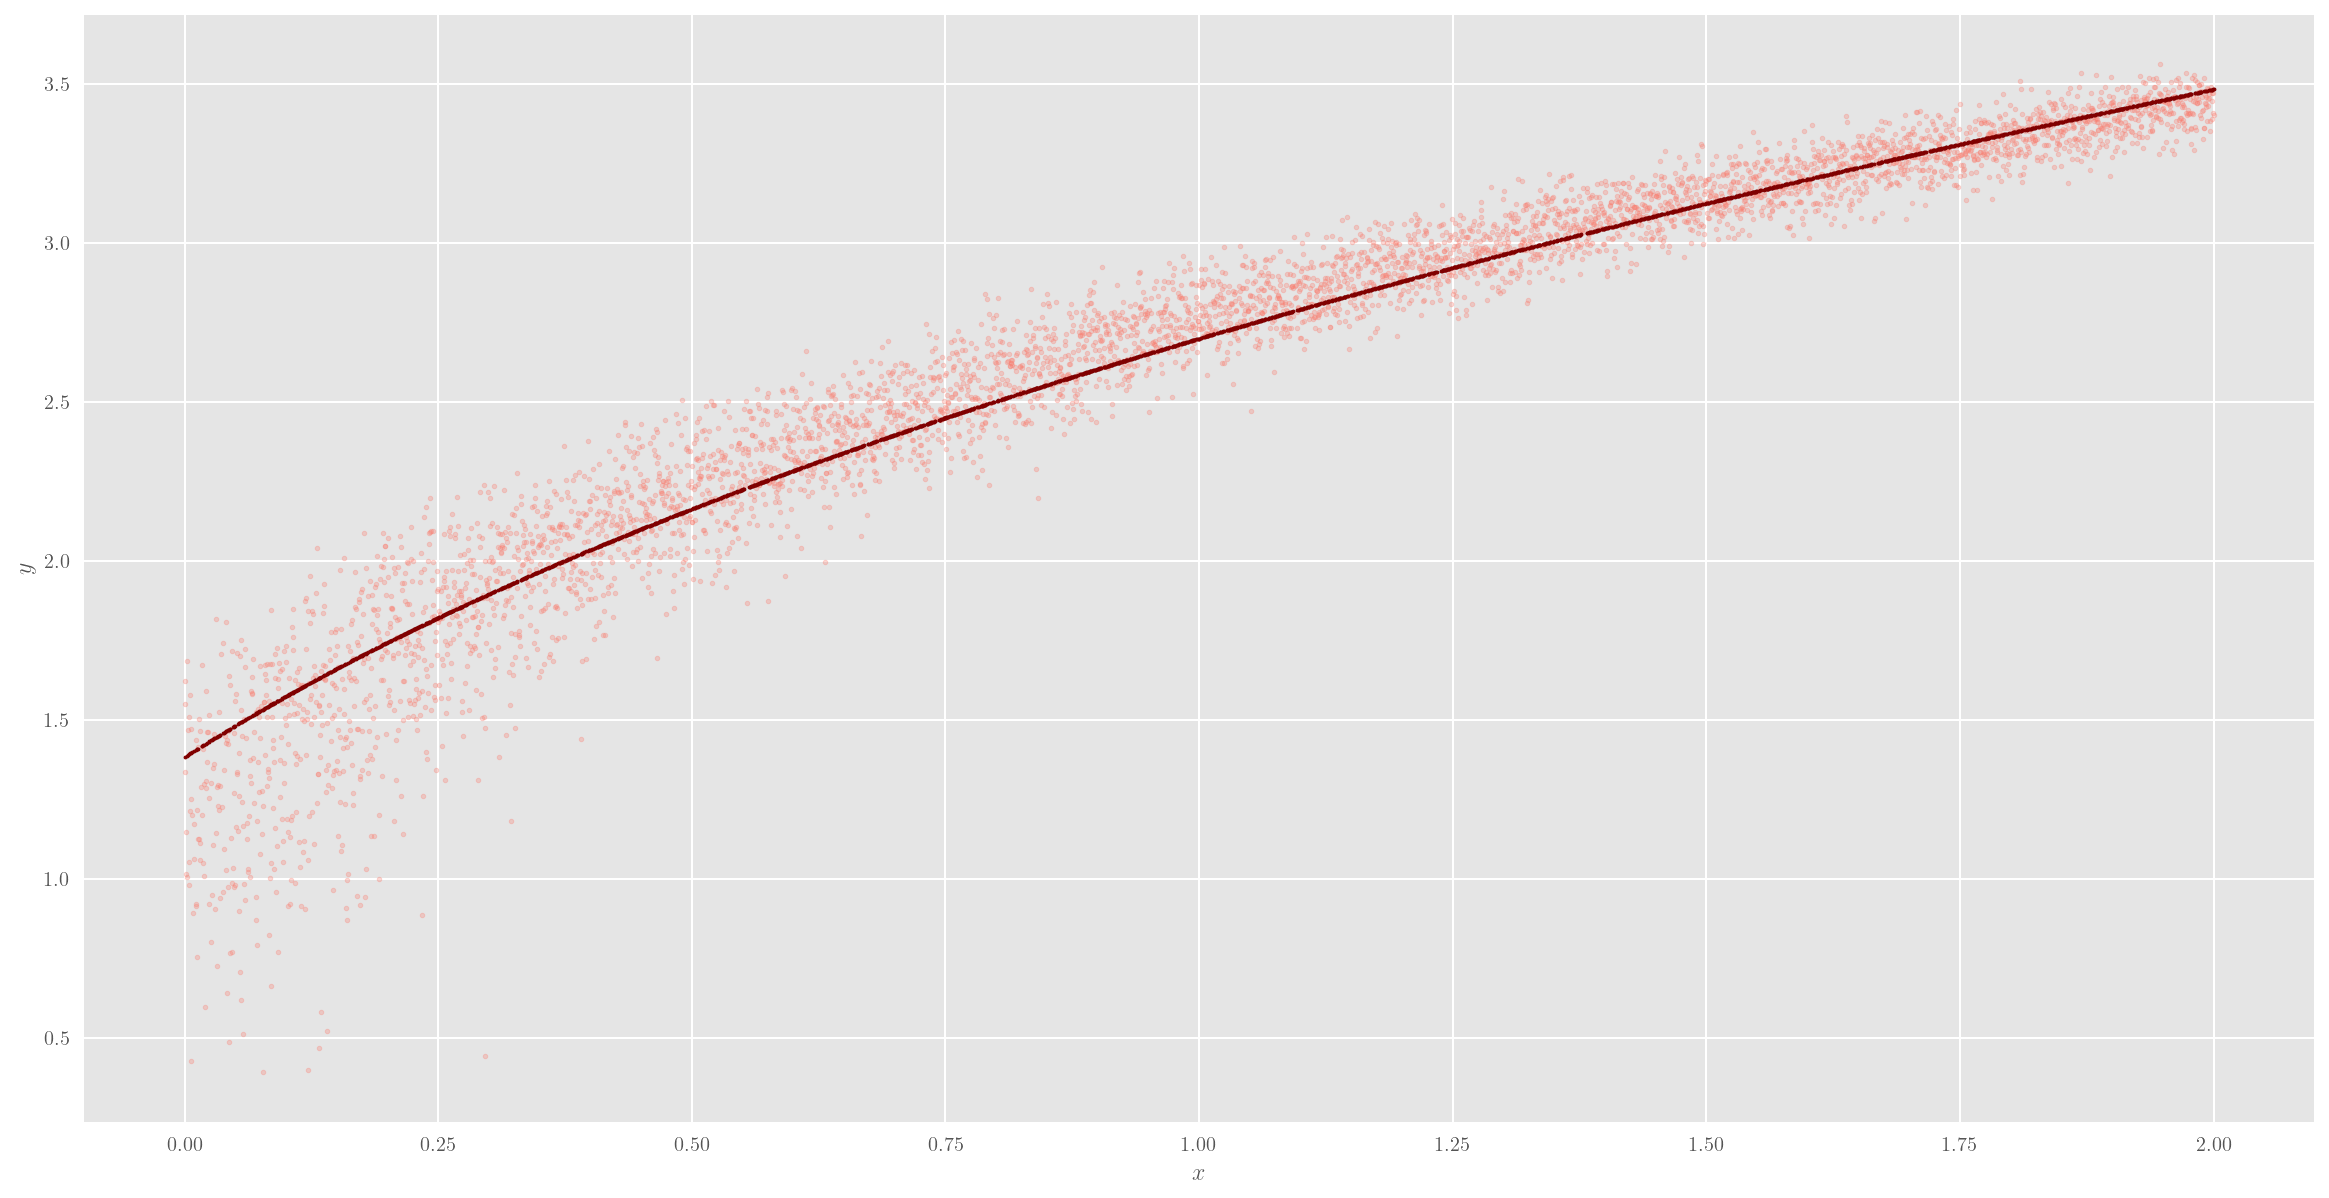

In [39]:
plt.scatter(data.x,data.y, s=5, alpha=0.3, color='salmon')
plt.scatter(cleaned.x, cleaned.yhat, color='maroon', s=2)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# Conclusion

Power transformations are a power technique that can potentially lead to transformed features that have a more normal distribution of values. Furthermore, sometimes this leads to the uncovering of a more linear relationship between the features, and so lead to more effective linear regression models in the power-transformed features.
